In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import models as md

## Stimulus generation (cf. Figure 1B and 1D of Bhattacharyya et. al 2017)

[ 131.57894737   65.78947368   44.64285714   33.78378378   26.88172043
   22.52252252]


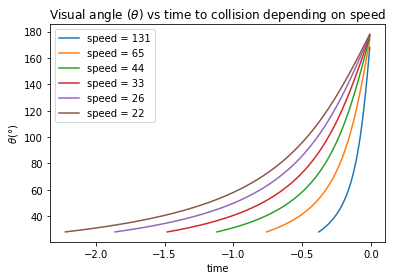

In [3]:
# these values are taken from Bhattacharyya et. al 2017:
LV_vals = np.array([0.19, 0.38, 0.56, 0.74, 0.93, 1.11])
stim_size = 25
speeds = 1/(LV_vals/stim_size)
print(speeds)

#plt.figure(figsize=(8,8))
for speed in speeds:
    t, stims, dists = md.generate_stimulus(stim_size=stim_size, speed=speed, dt=0.01)
    collision_idx = np.argmin(np.abs(dists))
    t_collision = t[collision_idx]
    stim_collision = stims[collision_idx]
    
    before_collision_mask = t<t_collision
    t_to_collision = t[before_collision_mask] - t_collision
    stim_to_collision = stims[before_collision_mask]
    plt.plot(t_to_collision, stim_to_collision, label='speed = ' + str(int(speed)))
plt.xlabel('time')
plt.ylabel(r'$\theta (\degree)$')
plt.title(r'Visual angle ($\theta$) vs time to collision depending on speed')
plt.legend()
#print(dists)

## Leaky Integrate-and-Fire model of the Mauthner cell (adopted from Koyama et. al 2016)

In [4]:
tau_m = 0.023
e_l = -0.079
r_m = 10*1e6 # MOhm
v_t = -0.061
init_vm_std = 0.005
vt_std = 0.001

dt = 0.0001
total_time = 1

noise_std = 5*1e-3
n_timepoints = int(total_time/dt)

stimulus = np.arange(n_timepoints)*1e-11
sigma = noise_std * np.sqrt(dt)
print(sigma)
noise_vals = np.random.normal(loc=0.0, scale=sigma, size=n_timepoints)
#stimulus = noise_vals + stimulus

#np.random.seed(1)
time, v_m, spks, spk_idc = md.lif_dynamics(tau_m, e_l, r_m, stimulus, noise_vals, v_t, dt, total_time, init_vm_std, vt_std)

5e-05


In [5]:
%timeit md.lif_dynamics(tau_m, e_l, r_m, stimulus, noise_vals, v_t, dt, total_time, init_vm_std, vt_std)

9.21 ms ± 46.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
%timeit md.jit_lif_dynamics(tau_m, e_l, r_m, stimulus, noise_vals, v_t, dt, total_time, init_vm_std, vt_std)

487 µs ± 17.8 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


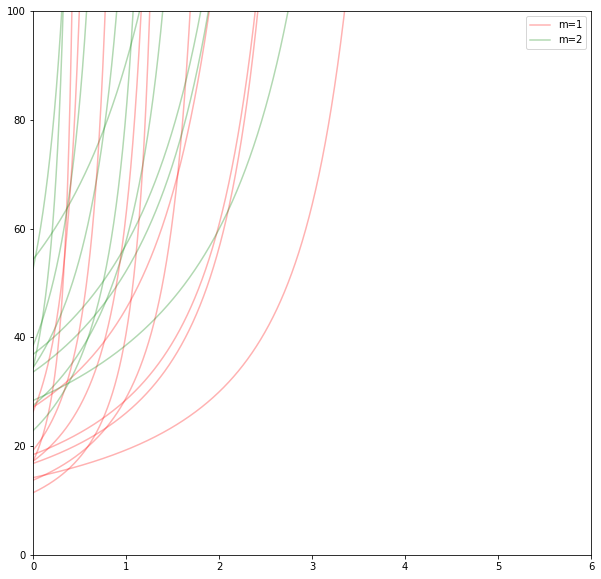

In [7]:
LV_vals = np.array([0.19, 0.38, 0.56, 0.74, 0.93, 1.11])
stim_size = 15
length = 10
dt = 0.001
m = 1.5
b = 0
speeds = 1/(LV_vals/stim_size)
speed = speeds[3]
plt.figure(figsize=(10, 10))
for i in range(10):
    lv = np.random.rand()*1.1 + 0.1
    stim_size = np.random.rand()*15 + 10
    speed = 1/(lv/stim_size)
    for m, mcolor in zip([1, 2], ['r', 'g']):
        t, stims, tstims, dists, t_to_collision, transformed_stim_to_collision = md.transform_stim(stim_size, speed, length, dt, m, b)
        if i == 0:
            plt.plot(t, tstims, c=mcolor, alpha=0.3, label='m=' + str(m))
        else:
            plt.plot(t, tstims, c=mcolor, alpha=0.3)
plt.xlim([0, 6])
plt.ylim([0, 100])
plt.legend()
#plt.plot(t, dists)

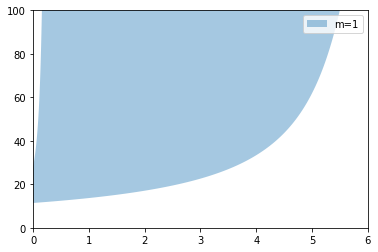

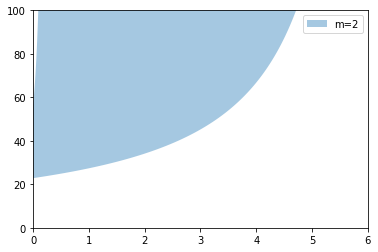

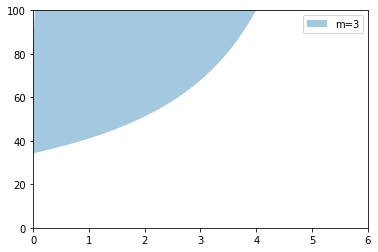

In [8]:
length = 10
dt = 0.001
m = 1.5
b = 0
plt.figure(figsize=(10, 10))

for m, mcolor in zip([1, 2, 3], ['r', 'g', 'b']):
    lv1 = 0.1
    lv2 = 1.2
    stim_size1 = 25
    stim_size2 = 10
    speed1 = 1/(lv1/stim_size1)
    speed2 = 1/(lv2/stim_size2)
    t, stims, tstims1, dists, t_to_collision, transformed_stim_to_collision = md.transform_stim(stim_size1, speed1, length, dt, m, b)
    t, stims, tstims2, dists, t_to_collision, transformed_stim_to_collision = md.transform_stim(stim_size2, speed2, length, dt, m, b)
    plt.figure()
    plt.fill_between(t, tstims1, tstims2, alpha=0.4, label='m=' + str(m), lw=4, linestyle='-')

    plt.xlim([0, 6])
    plt.ylim([0, 100])
    plt.legend()
#plt.plot(t, dists)

In [41]:
tau_m = 0.023
e_l = -0.079
r_m = 10*1e6 # MOhm
v_t = -0.061
init_vm_std = 0.00
vt_std = 0.00

dt = 0.001
total_time = 5

noise_std = 0*1e-3
n_timepoints = int(total_time/dt)

# generate looming stimulus
LV_vals = np.array([0.19, 0.38, 0.56, 0.74, 0.93, 1.11])
stim_size = 10
speeds = 1/(LV_vals/stim_size)
speed = speeds[2]

m = 5.5
b = 5

t, stims, tstims, dists, t_to_collision, transformed_stim_to_collision = md.transform_stim(stim_size, speed, total_time,
                                                                                        dt, m, b)

stimulus = tstims*1e-11
sigma = noise_std * np.sqrt(dt)
#print(sigma)
noise_vals = np.random.normal(loc=0.0, scale=sigma, size=n_timepoints)
#stimulus = noise_vals + stimulus

#np.random.seed(1)
time, v_m, spks, spk_idc = md.jit_lif_dynamics(tau_m, e_l, r_m, stimulus, noise_vals, v_t, dt, total_time, init_vm_std,
                                            vt_std)
first_spike = spks[0]
first_spike_idx = spk_idc[0]

Response angle at first spike: 32.5204094166 degree
Distance at first spike: 17.1428571429 mm


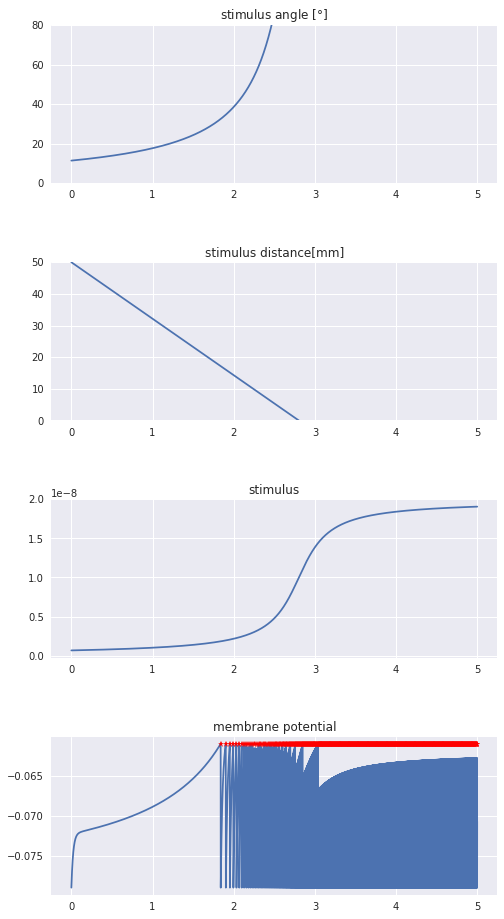

In [42]:
fig, axes = plt.subplots(4, 1, figsize=(8,16))
axes[0].plot(time, stims)
axes[0].set_title(r'stimulus angle [$ \degree $]')
axes[0].set_ylim([0, 80])
axes[1].plot(time, dists)
axes[1].set_title('stimulus distance[mm]')
axes[1].set_ylim([0, 50])
axes[2].plot(time, stimulus)
axes[2].set_title('stimulus')
axes[3].plot(time, v_m)
axes[3].set_title('membrane potential')
if not len(spks) == 0:
    axes[3].plot(spks, np.ones(len(spks))*v_t, 'r*')
plt.subplots_adjust(hspace=0.5)
print('Response angle at first spike: ' + str(stims[first_spike_idx]) + ' degree')
print('Distance at first spike: ' + str(dists[first_spike_idx]) + ' mm')

## One parameter set example

Mean visual angle: 36.0978192658
Mean distance: 27.0184265539
Mean reaction time: 0.938668
resp in ttc: -0.73


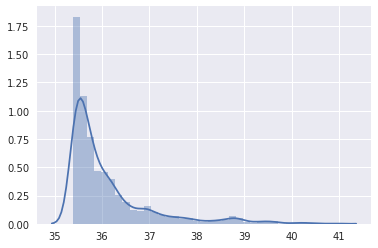

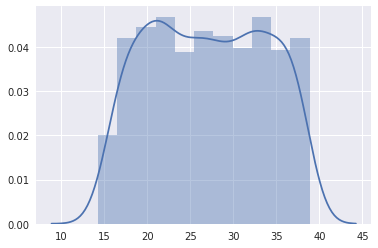

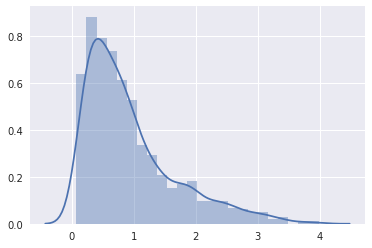

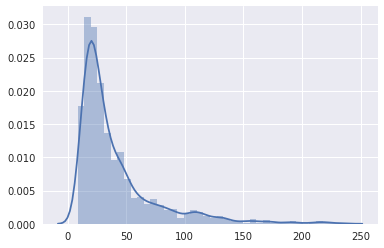

In [43]:
# generate looming stimulus
LV_vals = np.array([0.19, 0.38, 0.56, 0.74, 0.93, 1.11])
stim_size = 10
speeds = 1/(LV_vals/stim_size)
speed = speeds[1]

params = {'tau_m': 0.023,
          'e_l': -0.079,
          'r_m': 10*1e6,
          'v_t': -0.061,
          'init_vm_std': 0.000,
          'vt_std': 0.000,
          'dt': 0.001,
          'total_time': 5,
          'noise_std': 0*1e-3,
          'n_timepoints': int(total_time/dt),
          'm': 5,
          'b': 5}

nruns = 1000
rstims = np.zeros(nruns)
rdists = np.zeros(nruns)
reaction_times = np.zeros(nruns)
speeds = np.zeros(nruns)
for i in np.arange(nruns):
    rstims[i], rdists[i], reaction_times[i], lv, stim_size, speeds[i], resp_in_t_to_coll = md.calc_response(params)

sns.set()
sns.distplot(rstims)
print('Mean visual angle: ' + str(np.mean(rstims)))
plt.figure()
sns.distplot(rdists)
print('Mean distance: ' + str(np.mean(rdists)))
plt.figure()
sns.distplot(reaction_times)
plt.figure()
sns.distplot(speeds)
print('Mean reaction time: ' + str(np.mean(reaction_times)))
print('resp in ttc: ' + str(resp_in_t_to_coll))

## Analyzing the influence of m, b and noise

In [12]:
params = {'tau_m': 0.023,
          'e_l': -0.079,
          'r_m': 10*1e6, # MOhm
          'v_t': -0.061,
          'init_vm_std': 0.001,
          'vt_std': 0.001,
          'dt': 0.001,
          'total_time': 5,
          'noise_std': 5*1e-3,
          'n_timepoints': int(total_time/dt),
          'm': 4.5,
          'b': 5}

mvals = np.array([1, 2, 4, 6])
nmvals = len(mvals)
noisevals = np.array([1, 10, 20])*1e-3
nruns = 250
data_cols = ['resp_angle', 'resp_dist', 'resp_time', 'lv', 'stim_size', 'speed', 'm', 'noise', 'resp_time_coll']
data_dict = dict([(col_name, []) for col_name in data_cols])

for noise_idx, noise in enumerate(noisevals):
    params['noise_std'] = noise
    for m_idx, mval in enumerate(mvals):
        params['m'] = mval
        for i in np.arange(nruns):
            resp_angle, resp_dist, resp_time, lv, stim_size, speed, resp_time_coll = md.calc_response(params)
            resp_angle = np.round(resp_angle, decimals=1)
            resp_dist = np.round(resp_dist, decimals=1)
            resp_time = np.round(resp_time, decimals=3)
            lv = np.round(lv, decimals=2)
            stim_size = np.round(stim_size, decimals=1)
            speed = np.round(speed, decimals=1)
            resp_time_coll = np.round(resp_time_coll, decimals=3)
            result_values = [resp_angle, resp_dist, resp_time, lv, stim_size, speed, mval, noise, resp_time_coll]
            for col, value in zip(data_cols, result_values):
                data_dict[col].append(value)

In [13]:
df = pd.DataFrame(data_dict)

In [14]:
df.describe()

lv            m        noise   resp_angle    resp_dist  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean      0.654163     3.250000     0.010333    75.593733    19.413433   
std       0.317325     1.920607     0.007762    54.872914    15.439194   
min       0.100000     1.000000     0.001000    11.600000    -4.000000   
25%       0.380000     1.750000     0.001000    29.100000     5.800000   
50%       0.655000     3.000000     0.010000    46.700000    16.150000   
75%       0.930000     4.500000     0.020000   106.250000    31.700000   
max       1.200000     6.000000     0.020000   242.000000    50.000000   

         resp_time  resp_time_coll        speed    stim_size  
count  3000.000000     3000.000000  3000.000000  3000.000000  
mean      1.240409       -0.760886    38.909567    17.470400  
std       1.019106        0.769678    32.739321     4.330604  
min       0.000000       -4.999000     8.600000    10.000000  
25%       0.417750       -1.188000    18.575000    13.700000  
50%       0.971500       -0.518000    26.600000    17.500000  
75%       1.839000       -0.143000    46.925000    21.200000  
max       4.999000        0.000000   236.000000    25.000000

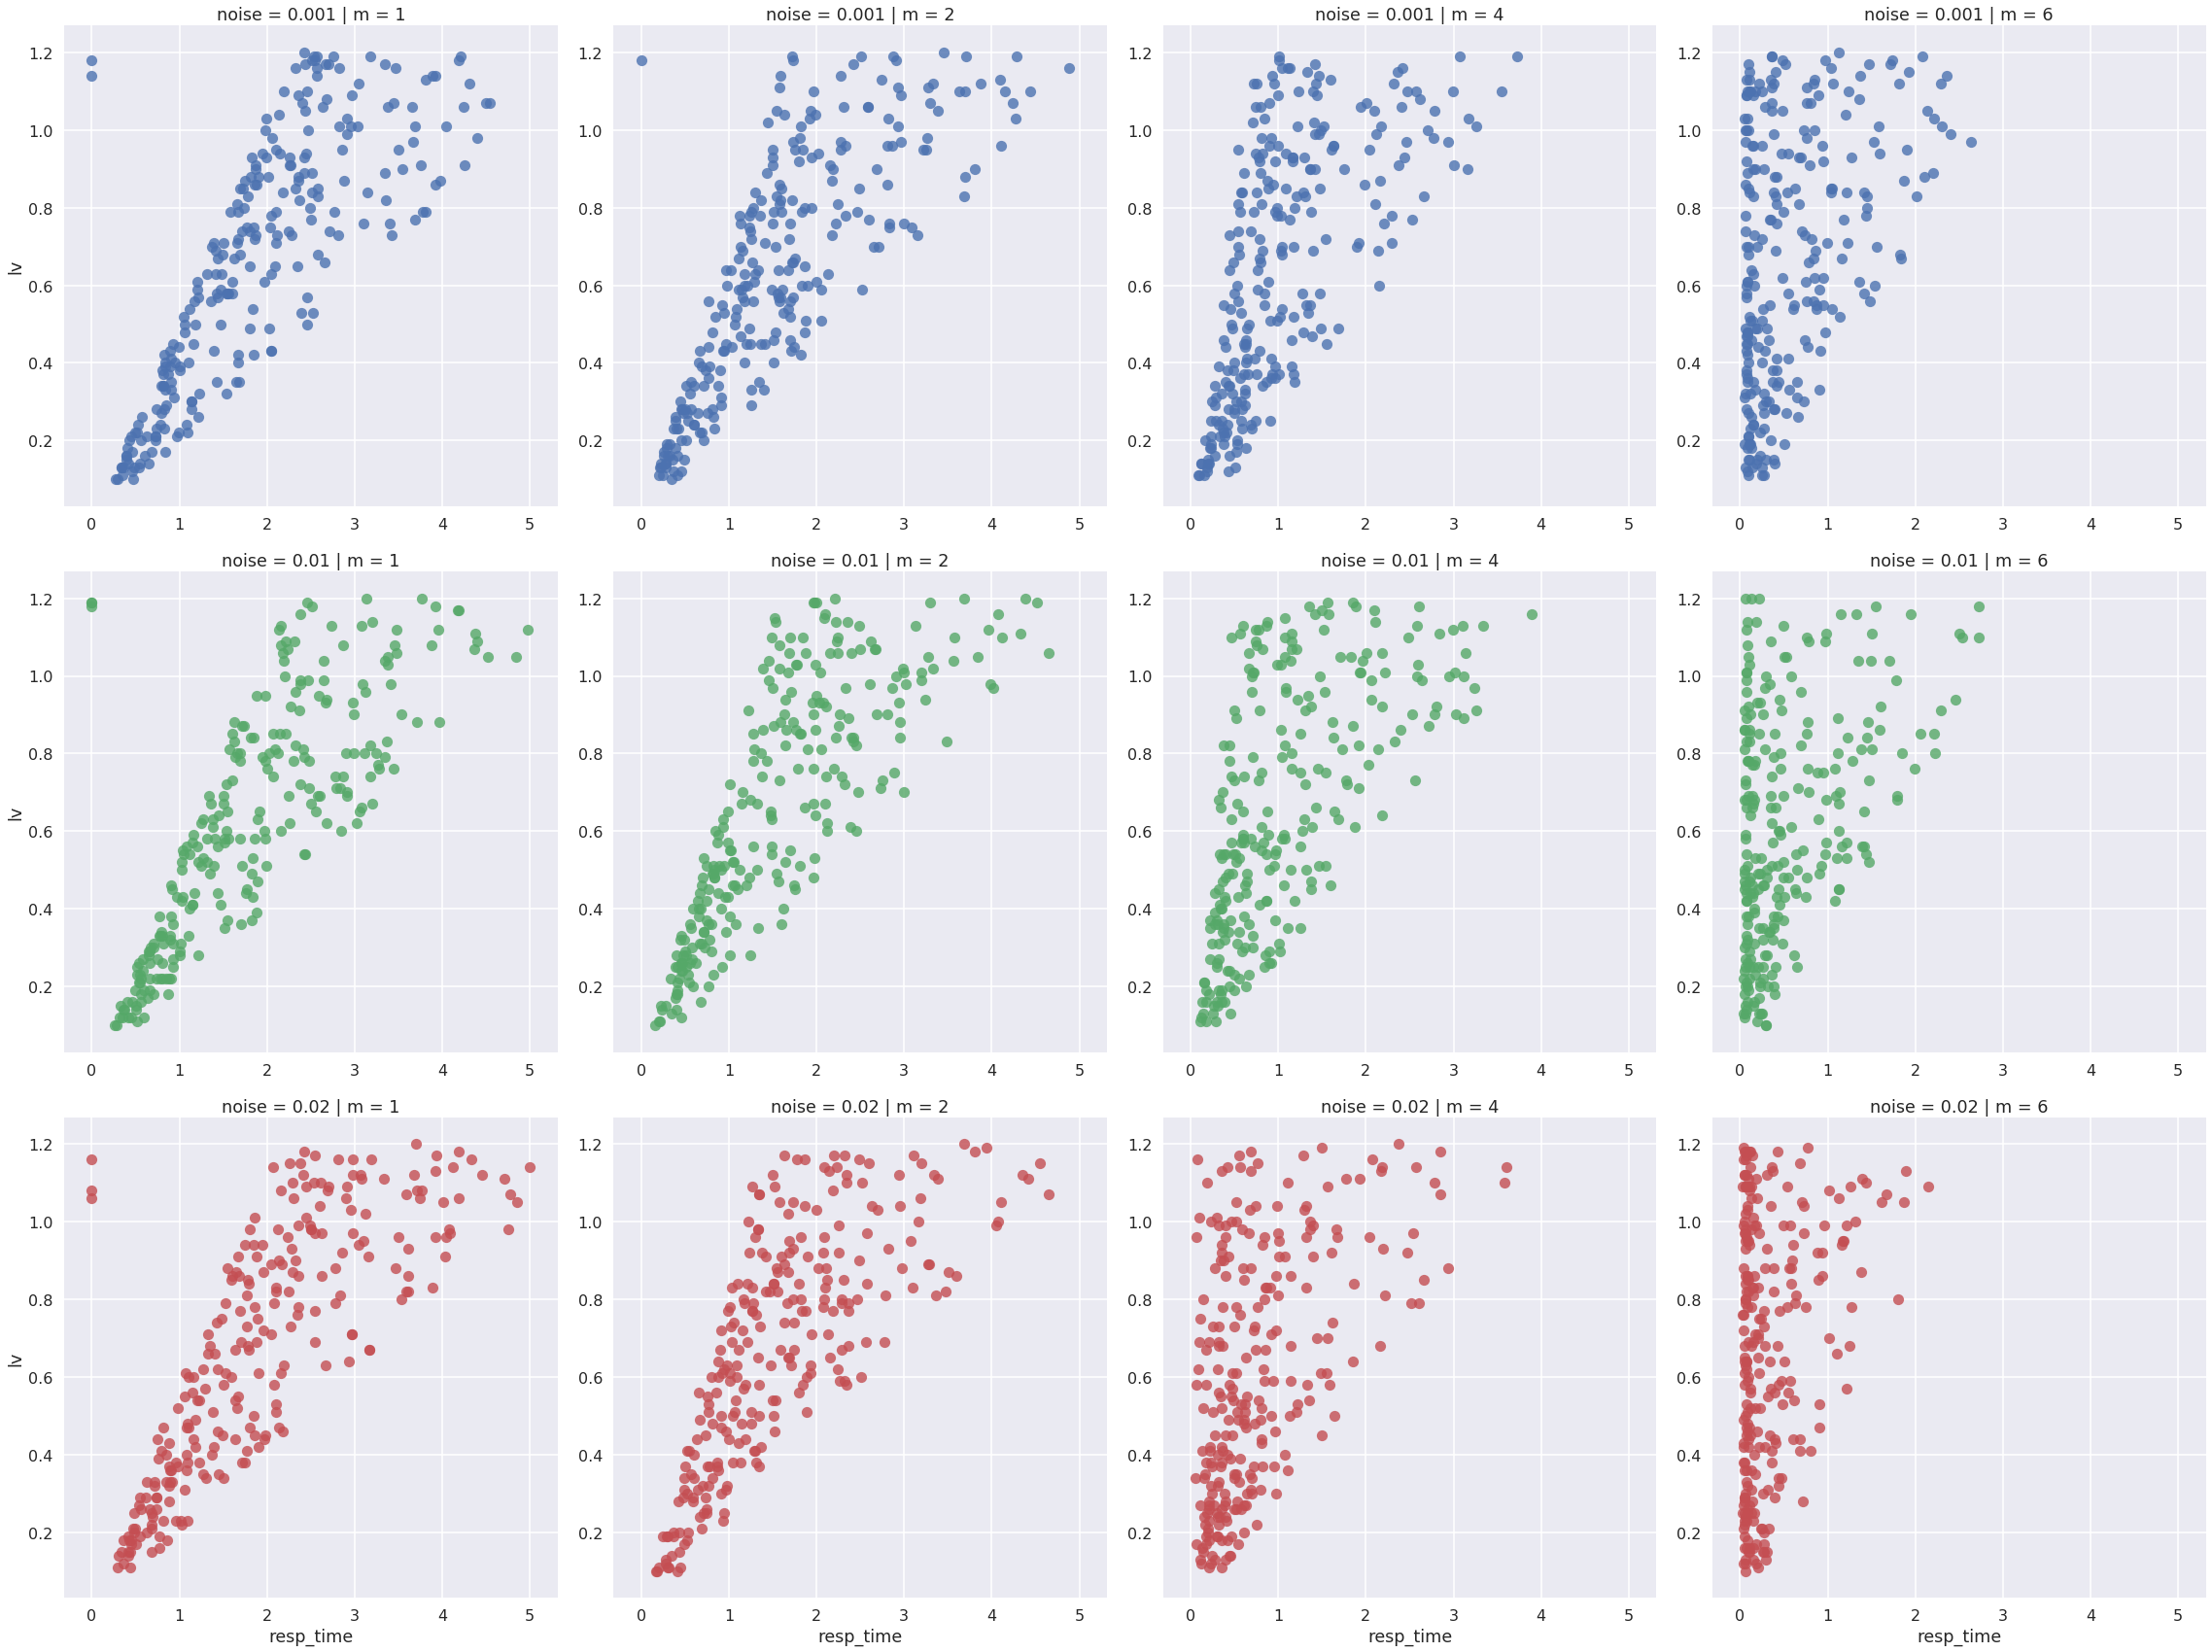

In [15]:
sns.set('poster')
g = sns.lmplot(x='resp_time', y='lv', col='m', row='noise', hue='noise', data=df, fit_reg=False, size=8)
g.savefig('rand_init_resp_time_vs_speed_b=5.pdf')

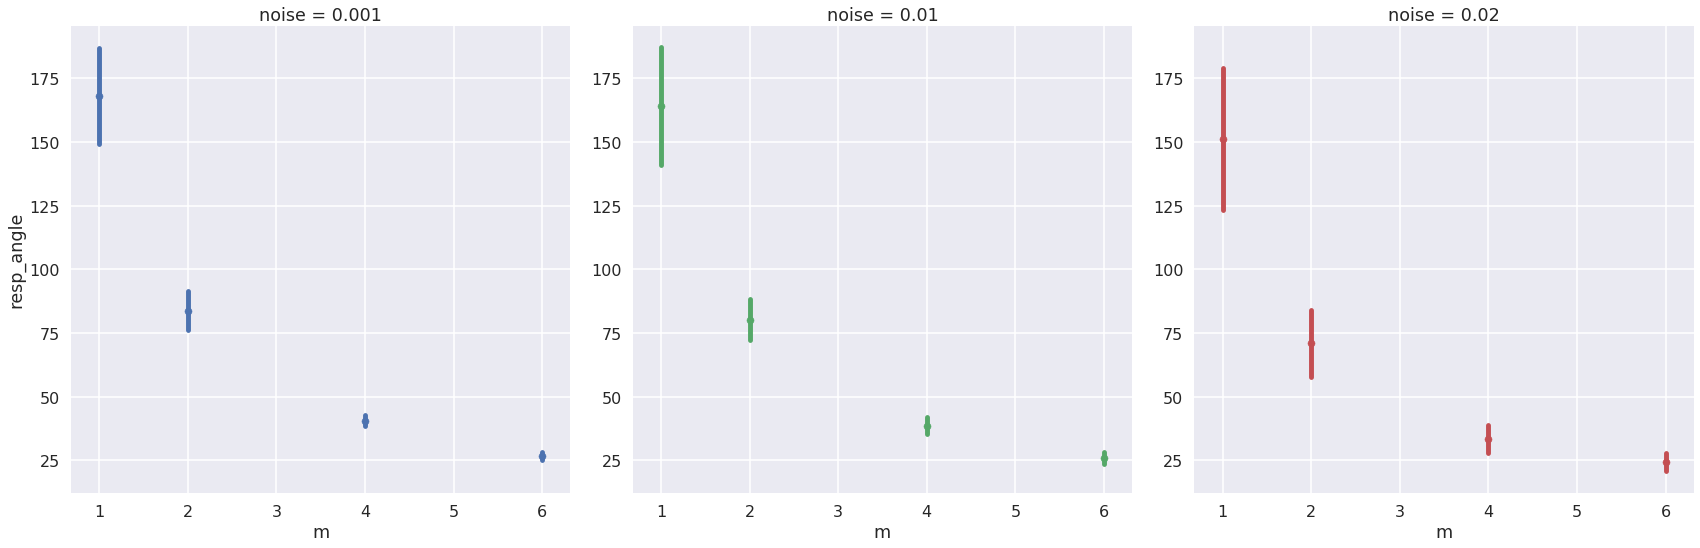

In [45]:
sns.set('poster')
g = sns.lmplot(x='m', y='resp_angle', hue='noise', col='noise', data=df, fit_reg=False, size=8, x_estimator=np.mean, x_ci='sd')
g.savefig('rand_init_resp_angle_vs_m_b=5.pdf')

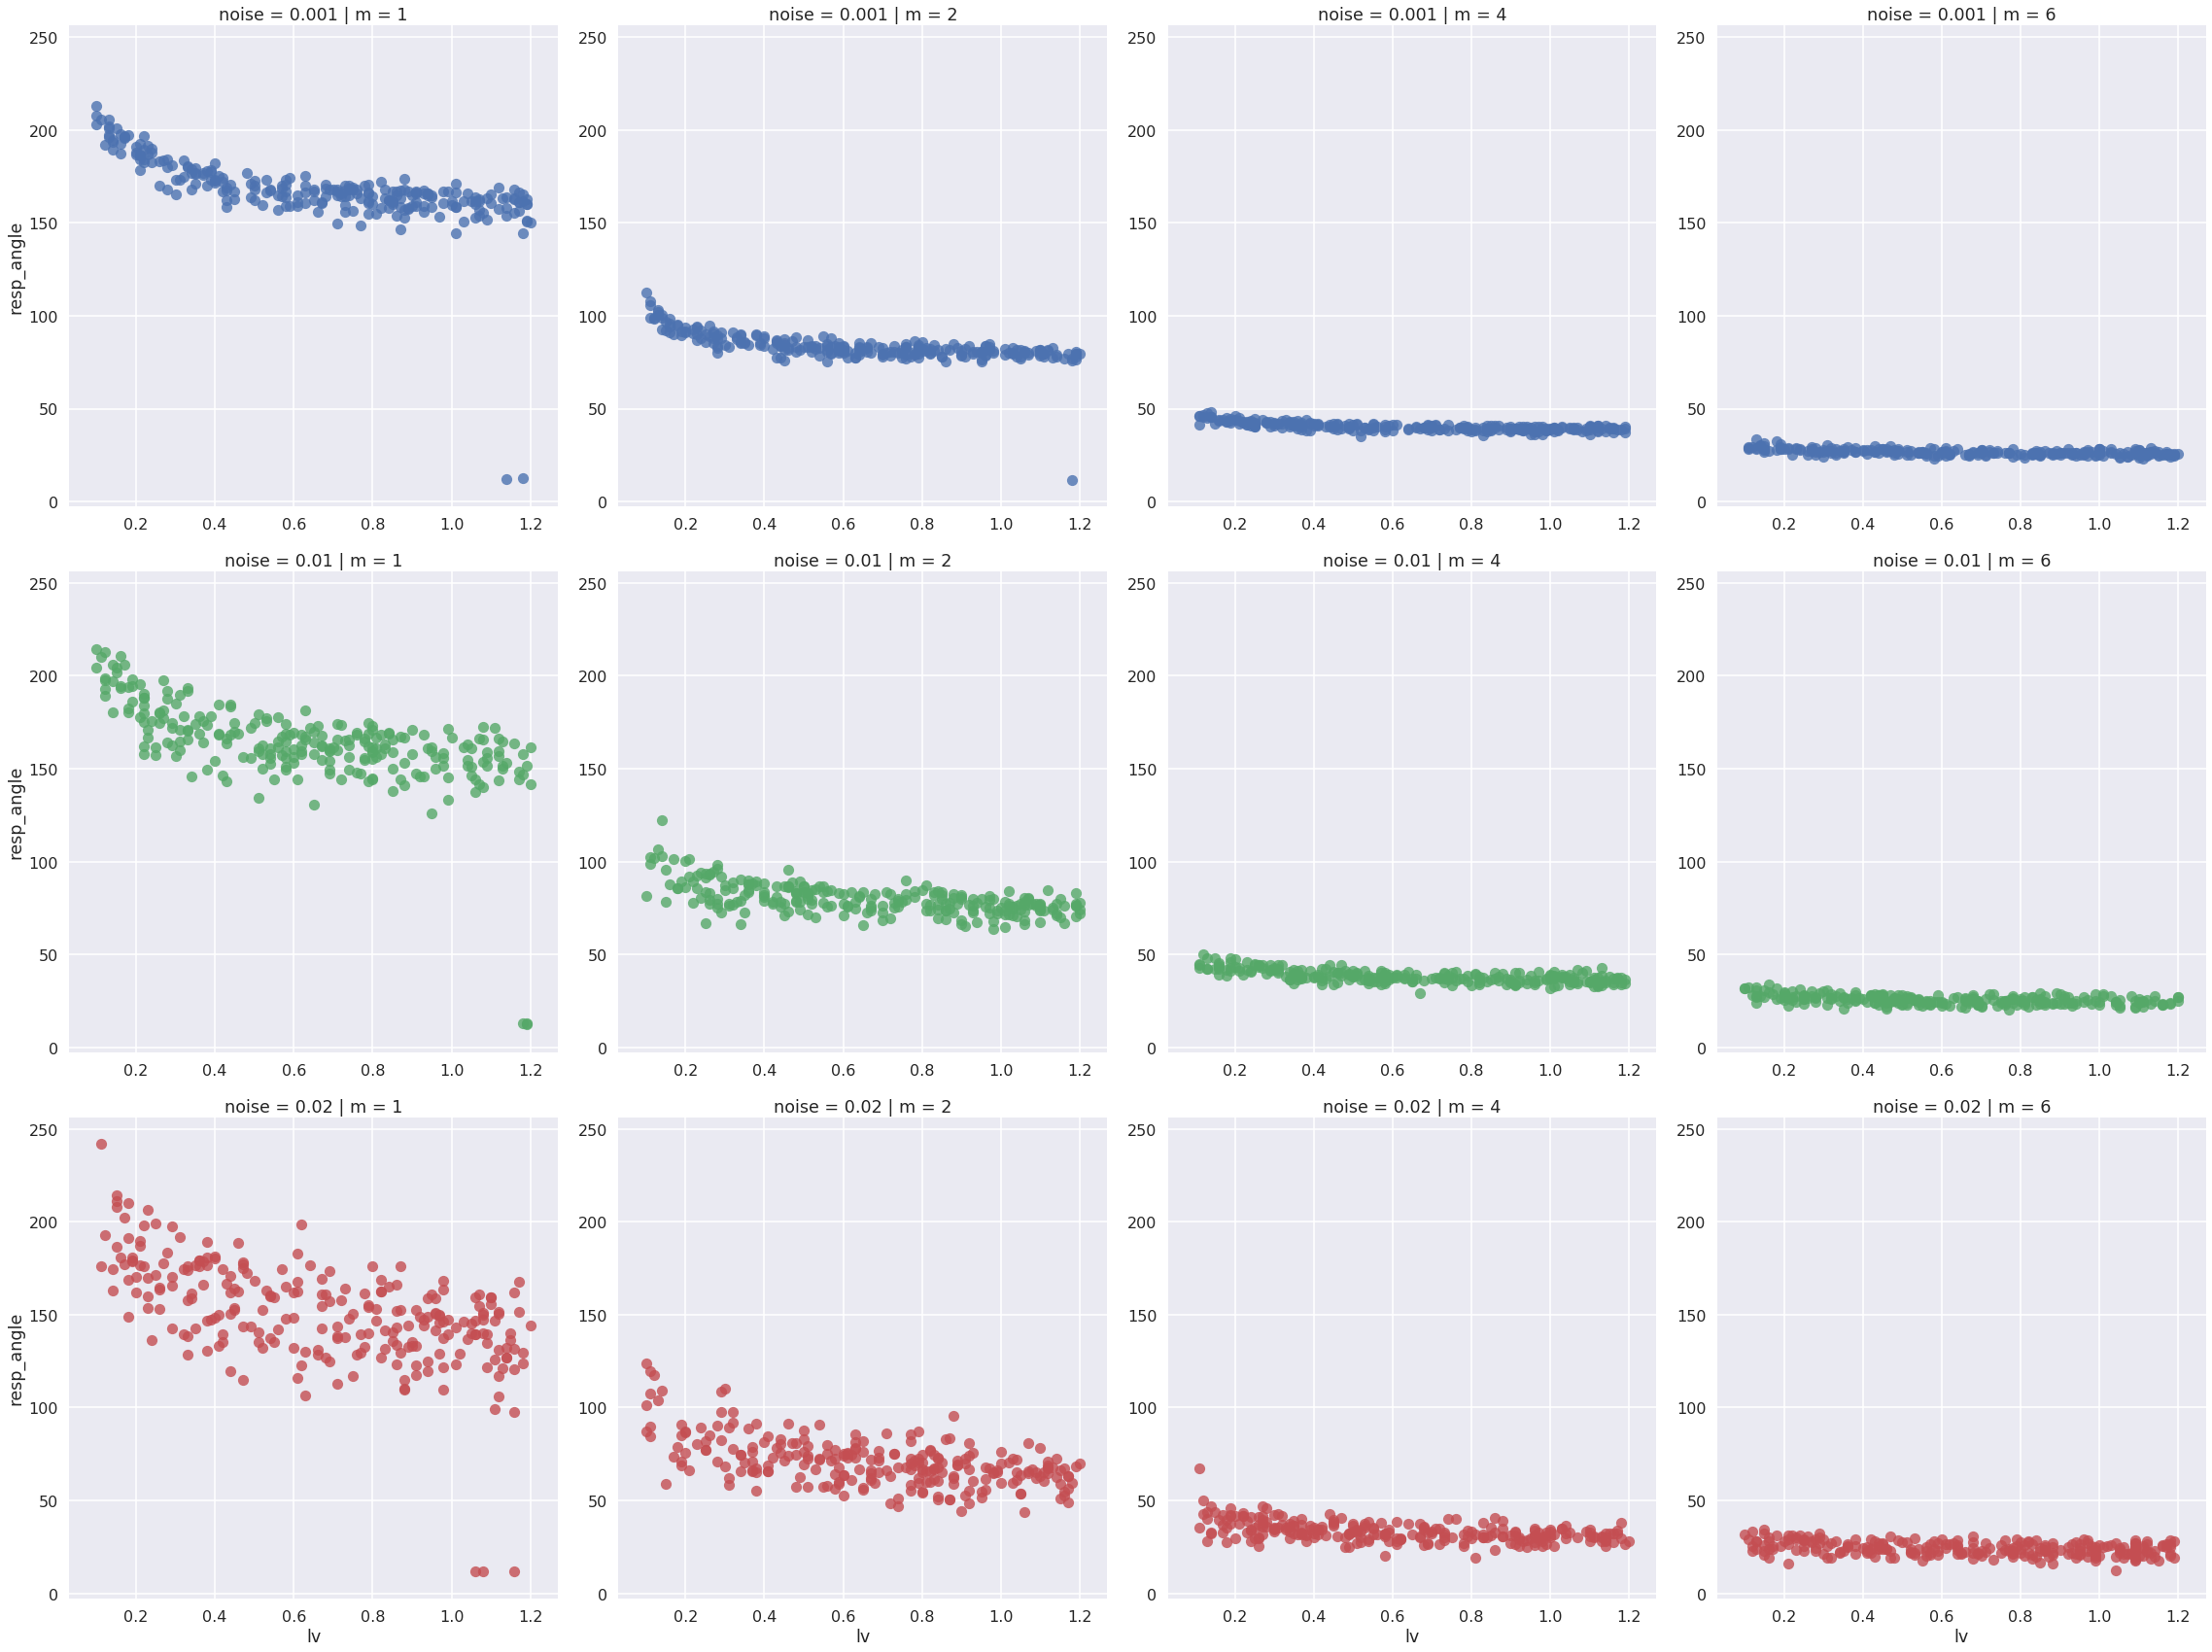

In [17]:
#sns.set('poster')
g = sns.lmplot(x='lv', y='resp_angle', hue='noise', row='noise', col='m', data=df, fit_reg=False, size=8)
g.savefig('rand_init_resp_angle_vs_lv_b=5.pdf')

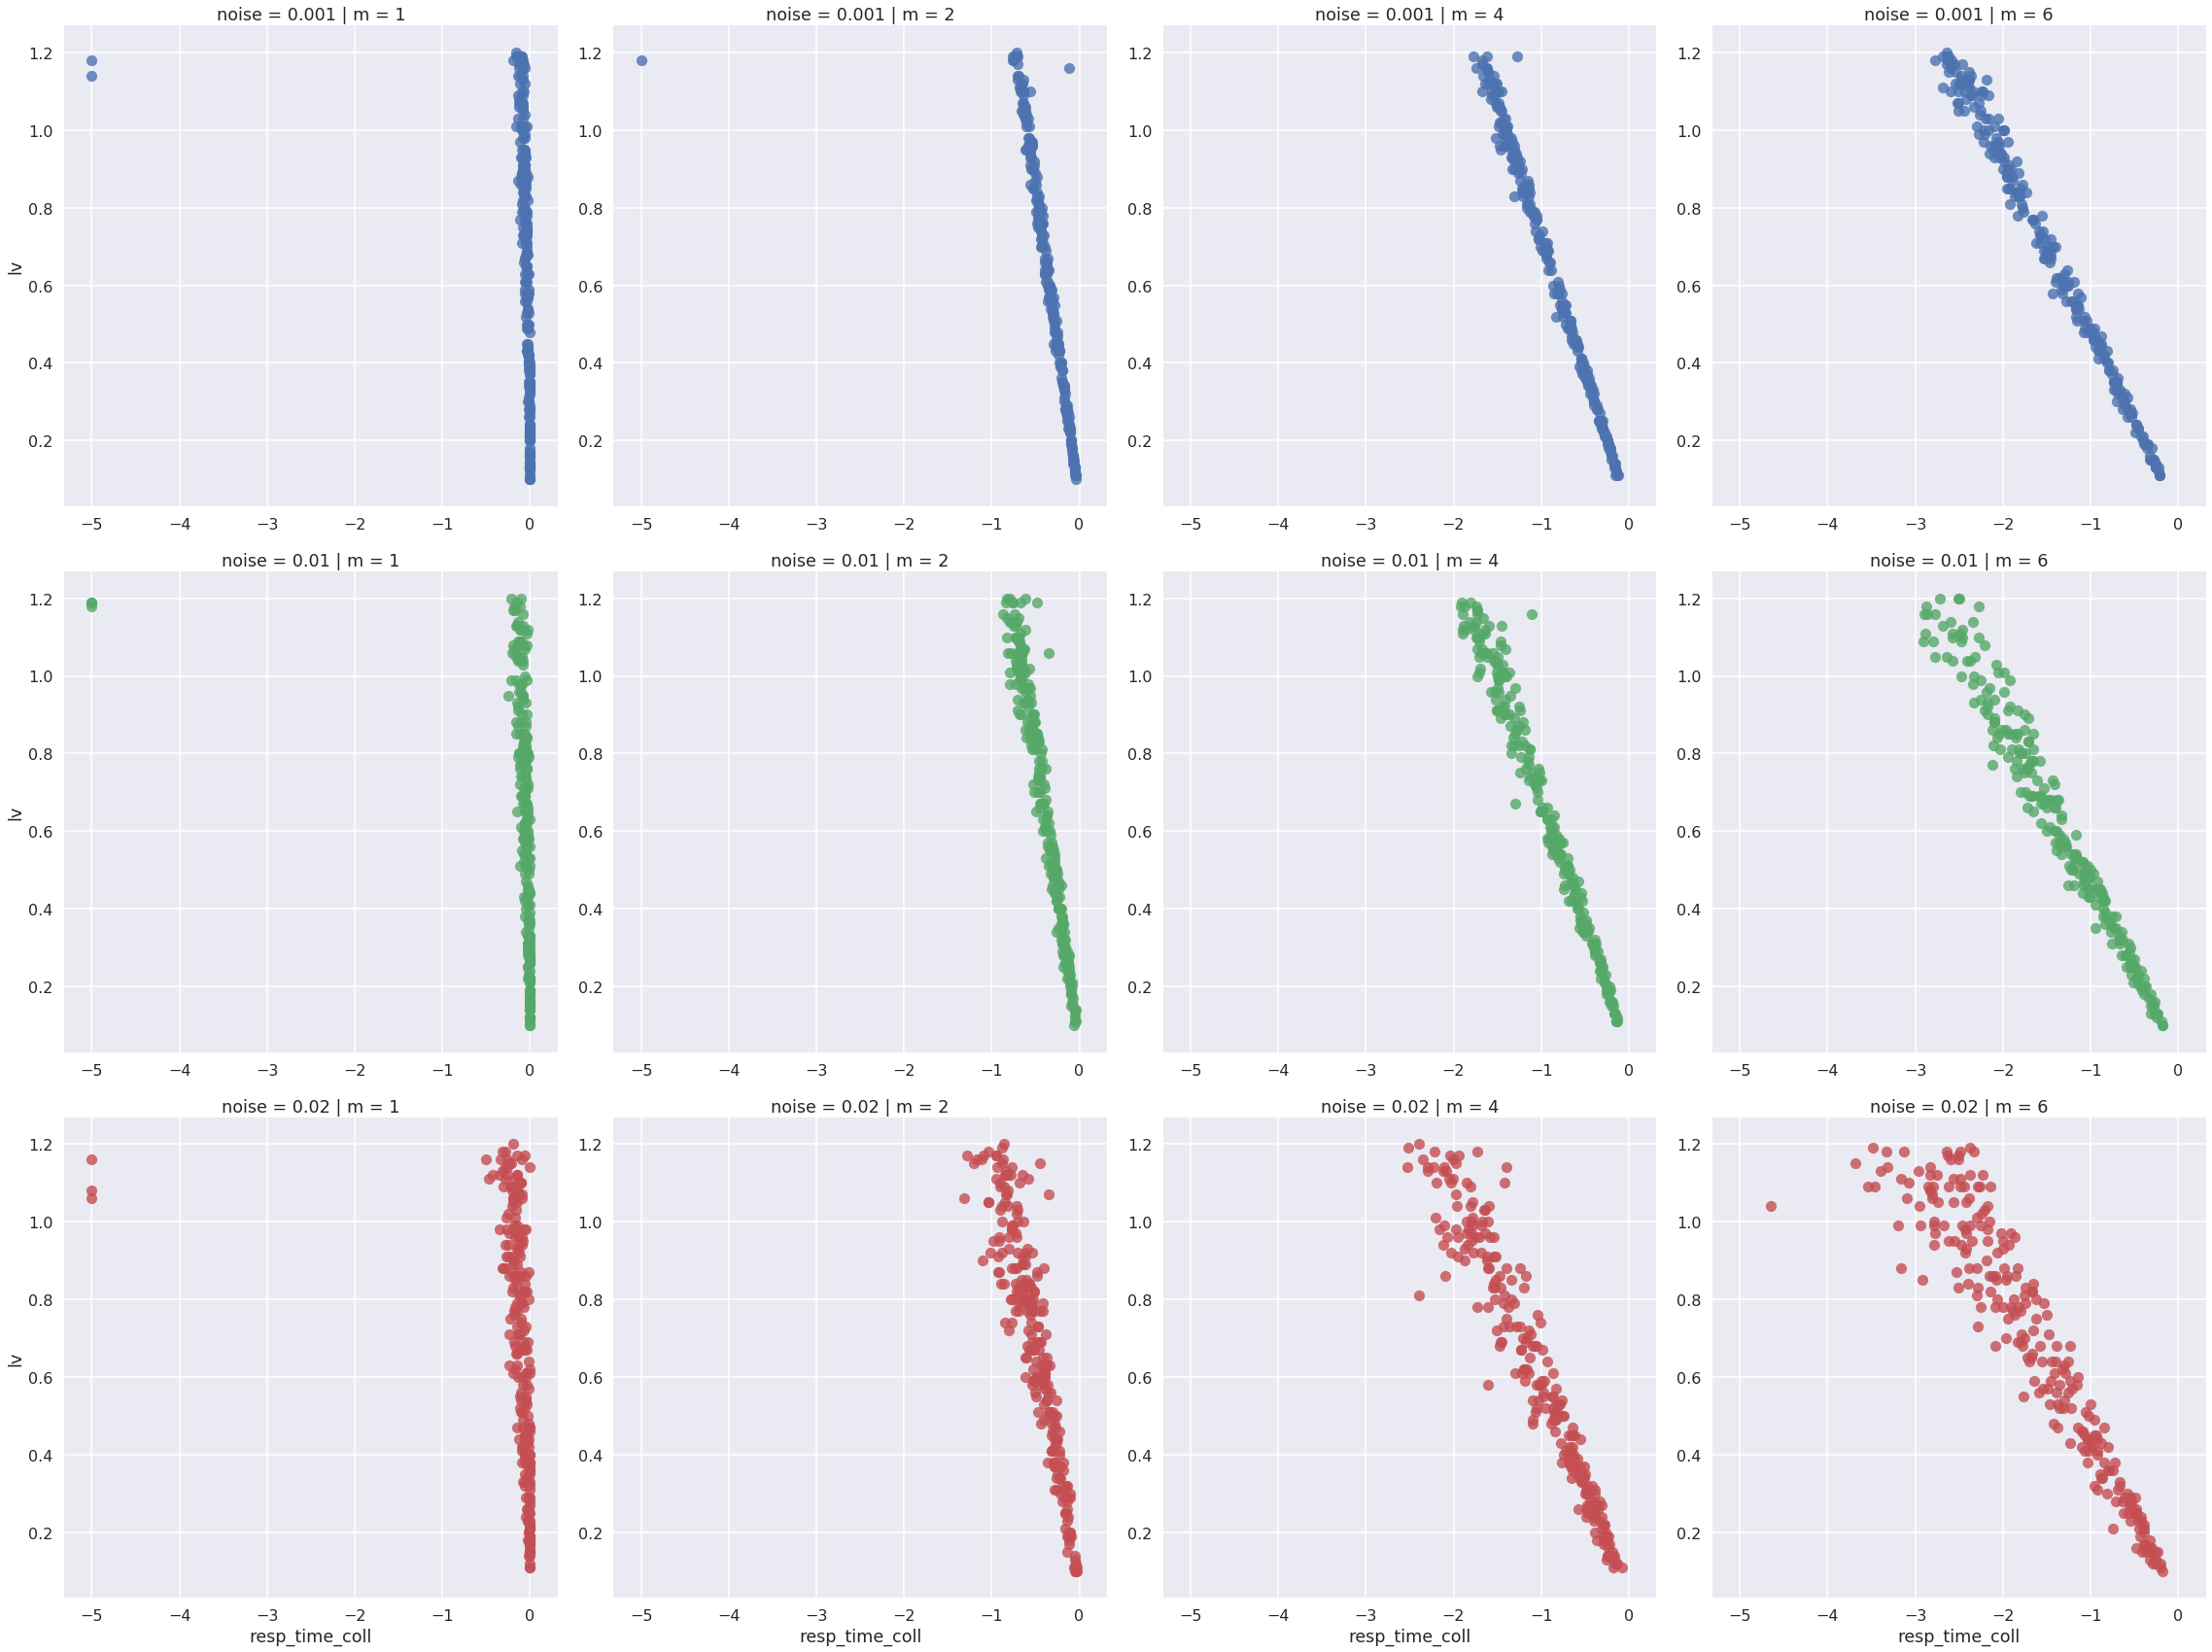

In [18]:
g = sns.lmplot(x='resp_time_coll', y='lv', hue='noise', row='noise', col='m', data=df, fit_reg=False, size=8)
g.savefig('rand_init_lv_vs_resp_time_coll_b=5.pdf')

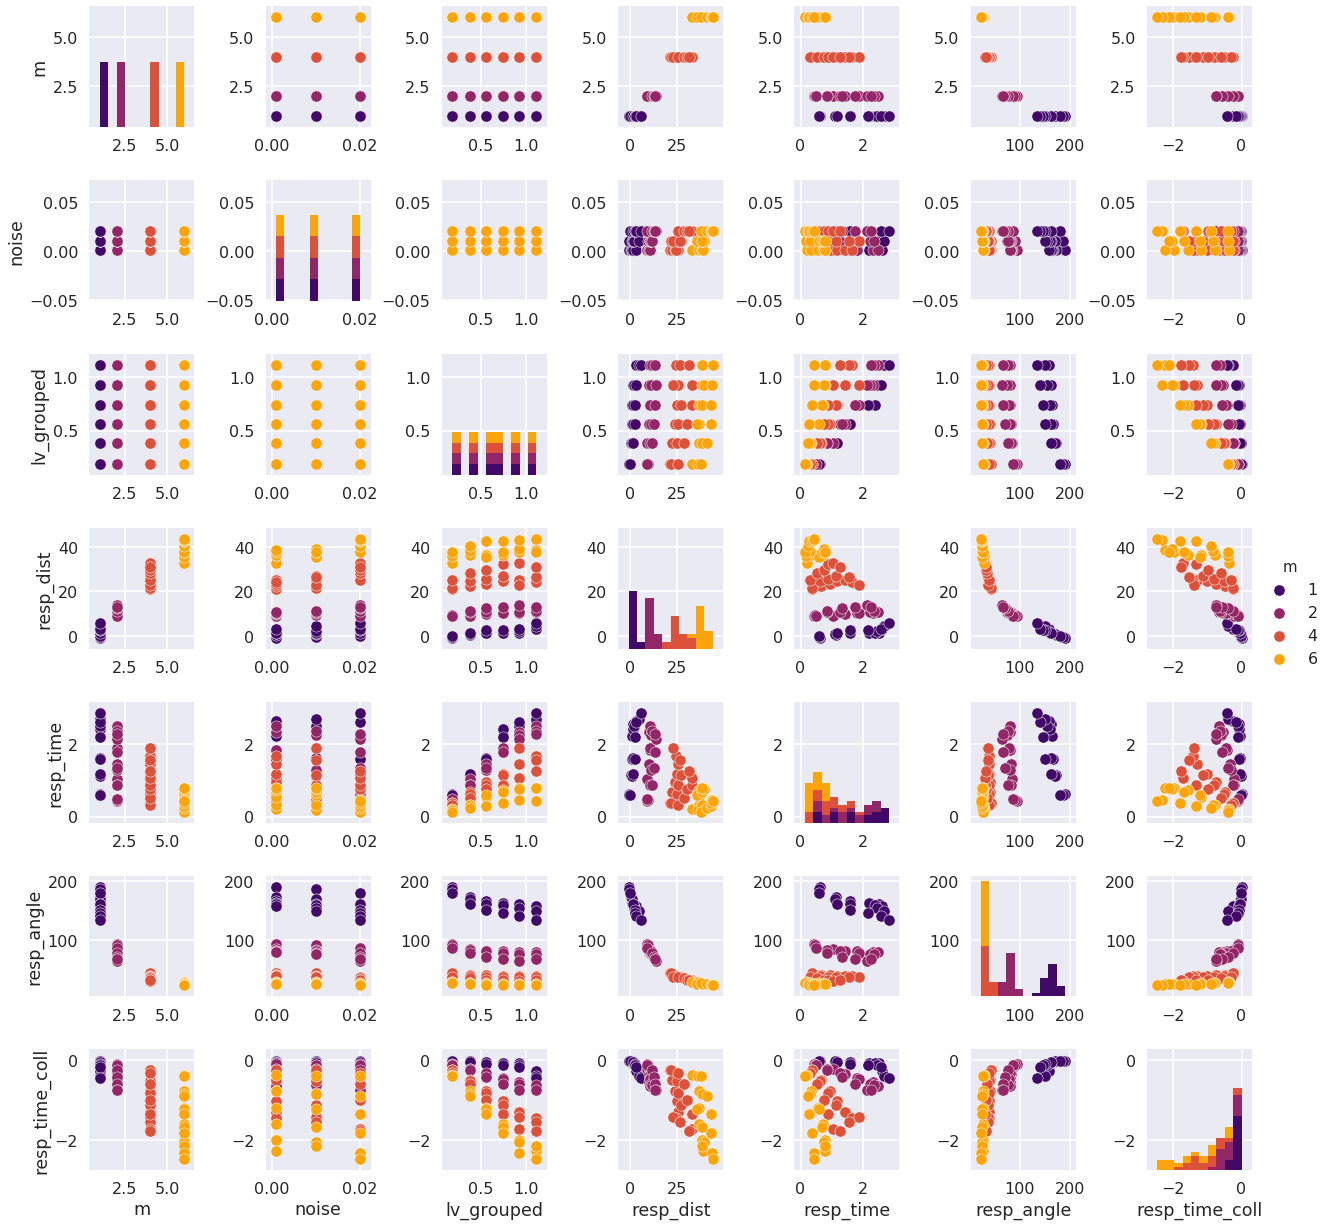

In [19]:
df['lv_grouped'] = df['lv'].map(md.lv_map)
grouped = df.groupby(['m', 'noise', 'lv_grouped'], as_index=False)
expdf = grouped.agg({'resp_dist': np.mean,
                     'resp_time': np.mean,
                     'resp_angle': np.mean,
                     'resp_time_coll': np.mean})

sns.pairplot(expdf, hue='m', palette='inferno')

In [20]:
params = {'tau_m': 0.023,
          'e_l': -0.079,
          'r_m': 10*1e6, # MOhm
          'v_t': -0.061,
          'init_vm_std': 0.000,
          'vt_std': 0.001,
          'dt': 0.001,
          'total_time': 5,
          'noise_std': 5*1e-3,
          'n_timepoints': int(total_time/dt),
          'm': 4.5,
          'b': 0}

mvals = np.array([1, 2, 3])
nmvals = len(mvals)
bvals = np.array([5, 10, 20])
vt_noisevals = np.array([2, 3, 4])*1e-3
nruns = 1000
data_cols = ['resp_angle', 'resp_dist', 'resp_time', 'lv', 'stim_size', 'speed', 'm', 'b', 'resp_time_coll',
             'vt_std']
data_dict = dict([(col_name, []) for col_name in data_cols])

for vtnoise_idx, vtnoise in enumerate(vt_noisevals):
    params['vt_std'] = vtnoise
    for b_idx, b in enumerate(bvals):
        params['b'] = b
        for m_idx, mval in enumerate(mvals):
            params['m'] = mval
            for i in np.arange(nruns):
                resp_angle, resp_dist, resp_time, lv, stim_size, speed, resp_time_coll = md.calc_response(params)
                resp_angle = np.round(resp_angle, decimals=1)
                resp_dist = np.round(resp_dist, decimals=1)
                resp_time = np.round(resp_time, decimals=3)
                lv = np.round(lv, decimals=2)
                stim_size = np.round(stim_size, decimals=1)
                speed = np.round(speed, decimals=1)
                resp_time_coll = np.round(resp_time_coll, decimals=3)
                result_values = [resp_angle, resp_dist, resp_time, lv, stim_size, speed, mval, b, resp_time_coll,
                                 vtnoise]
                for col, value in zip(data_cols, result_values):
                    data_dict[col].append(value)

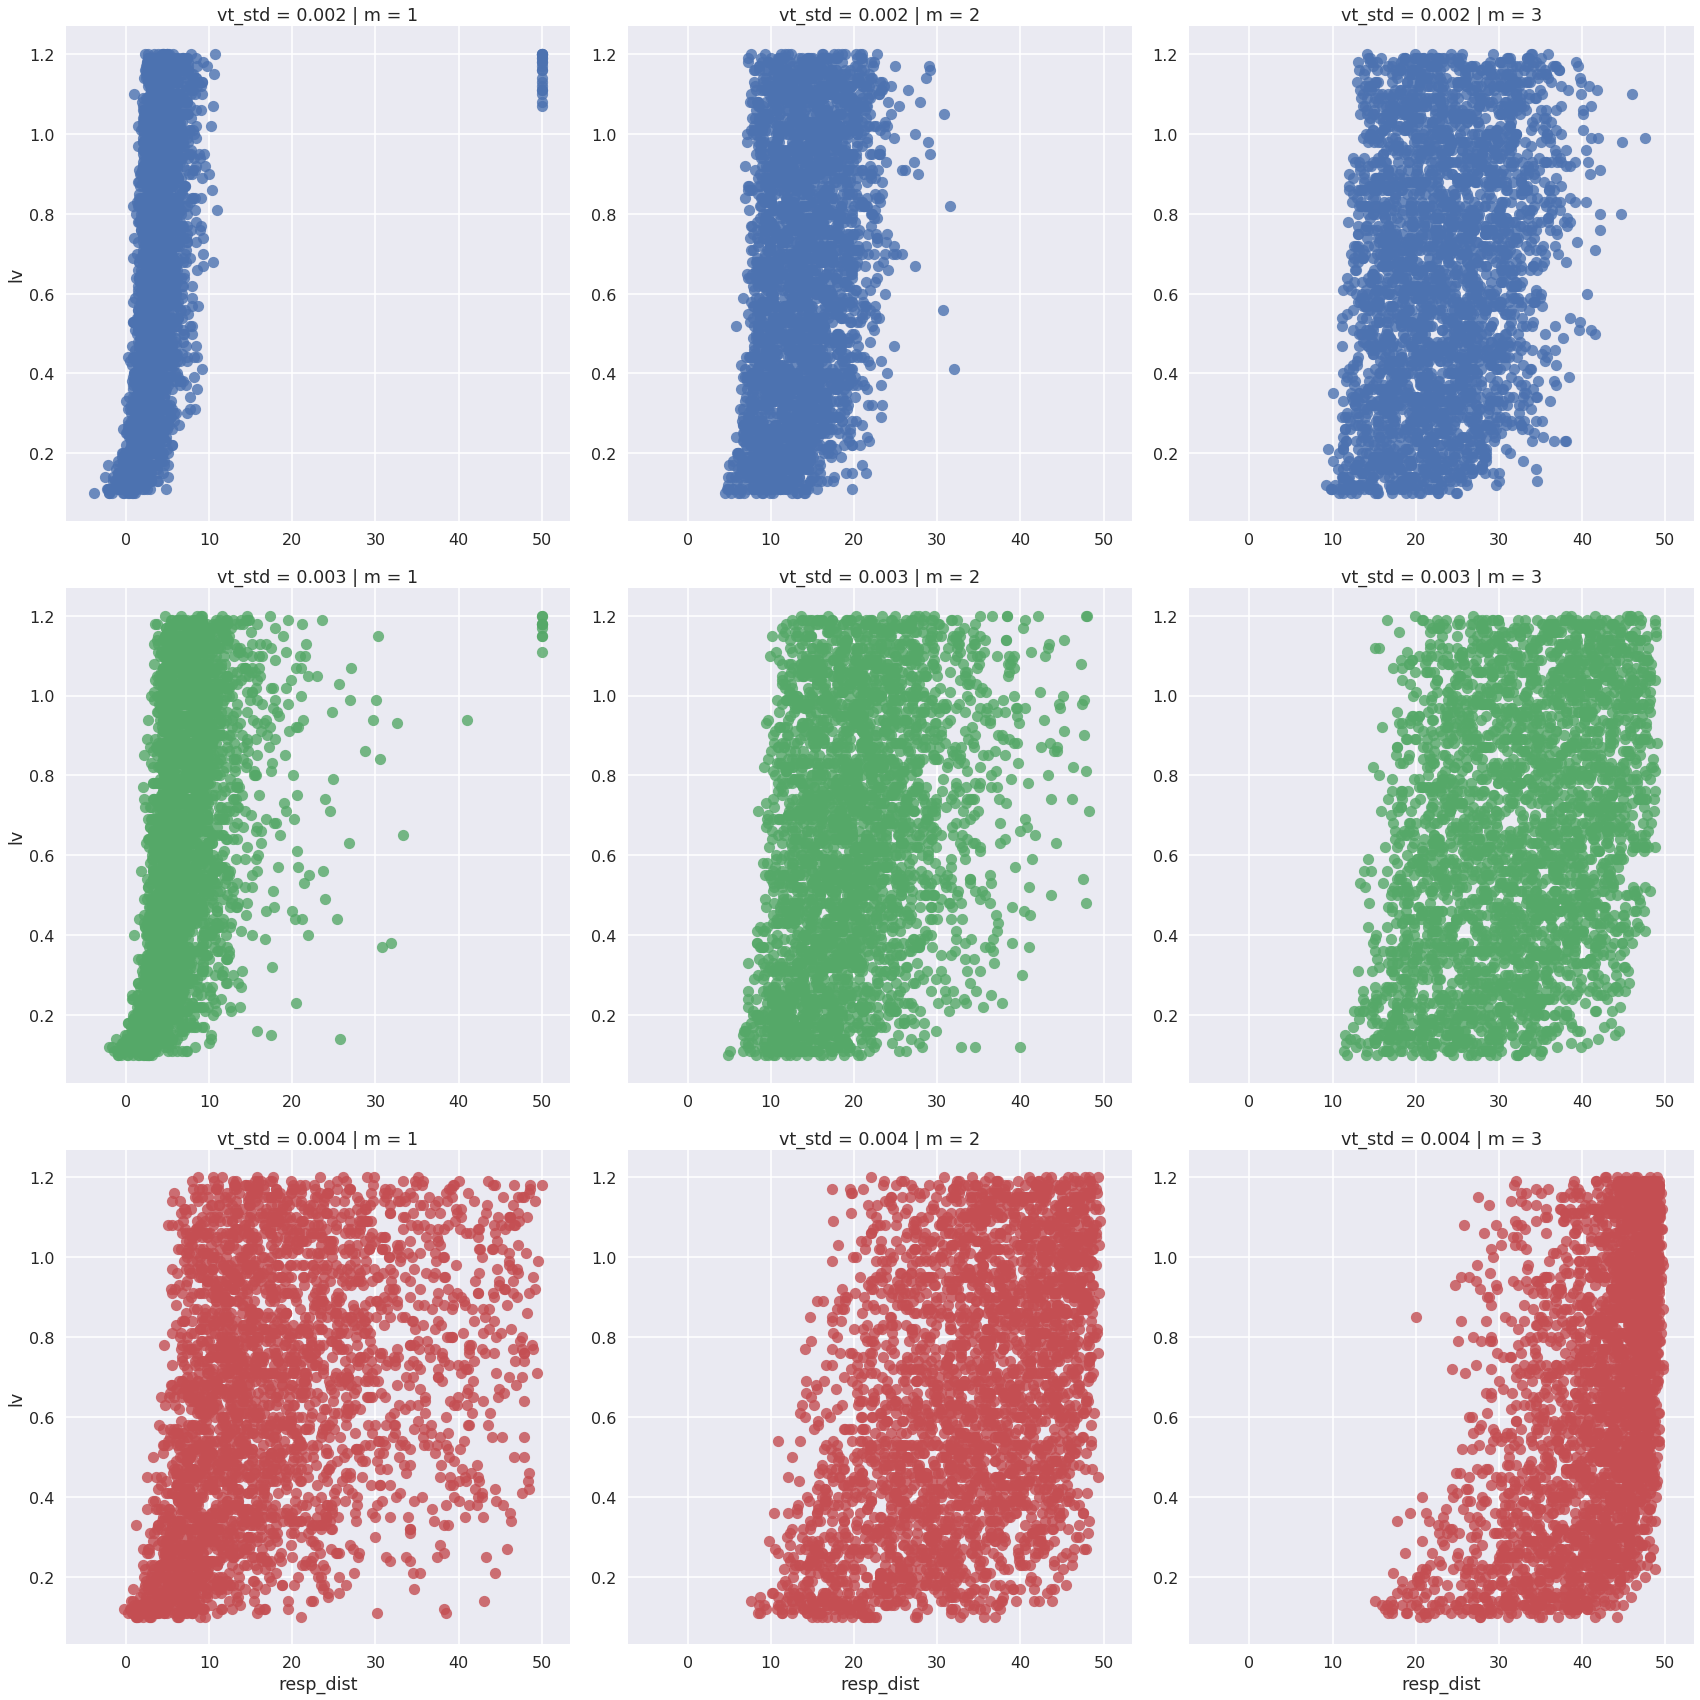

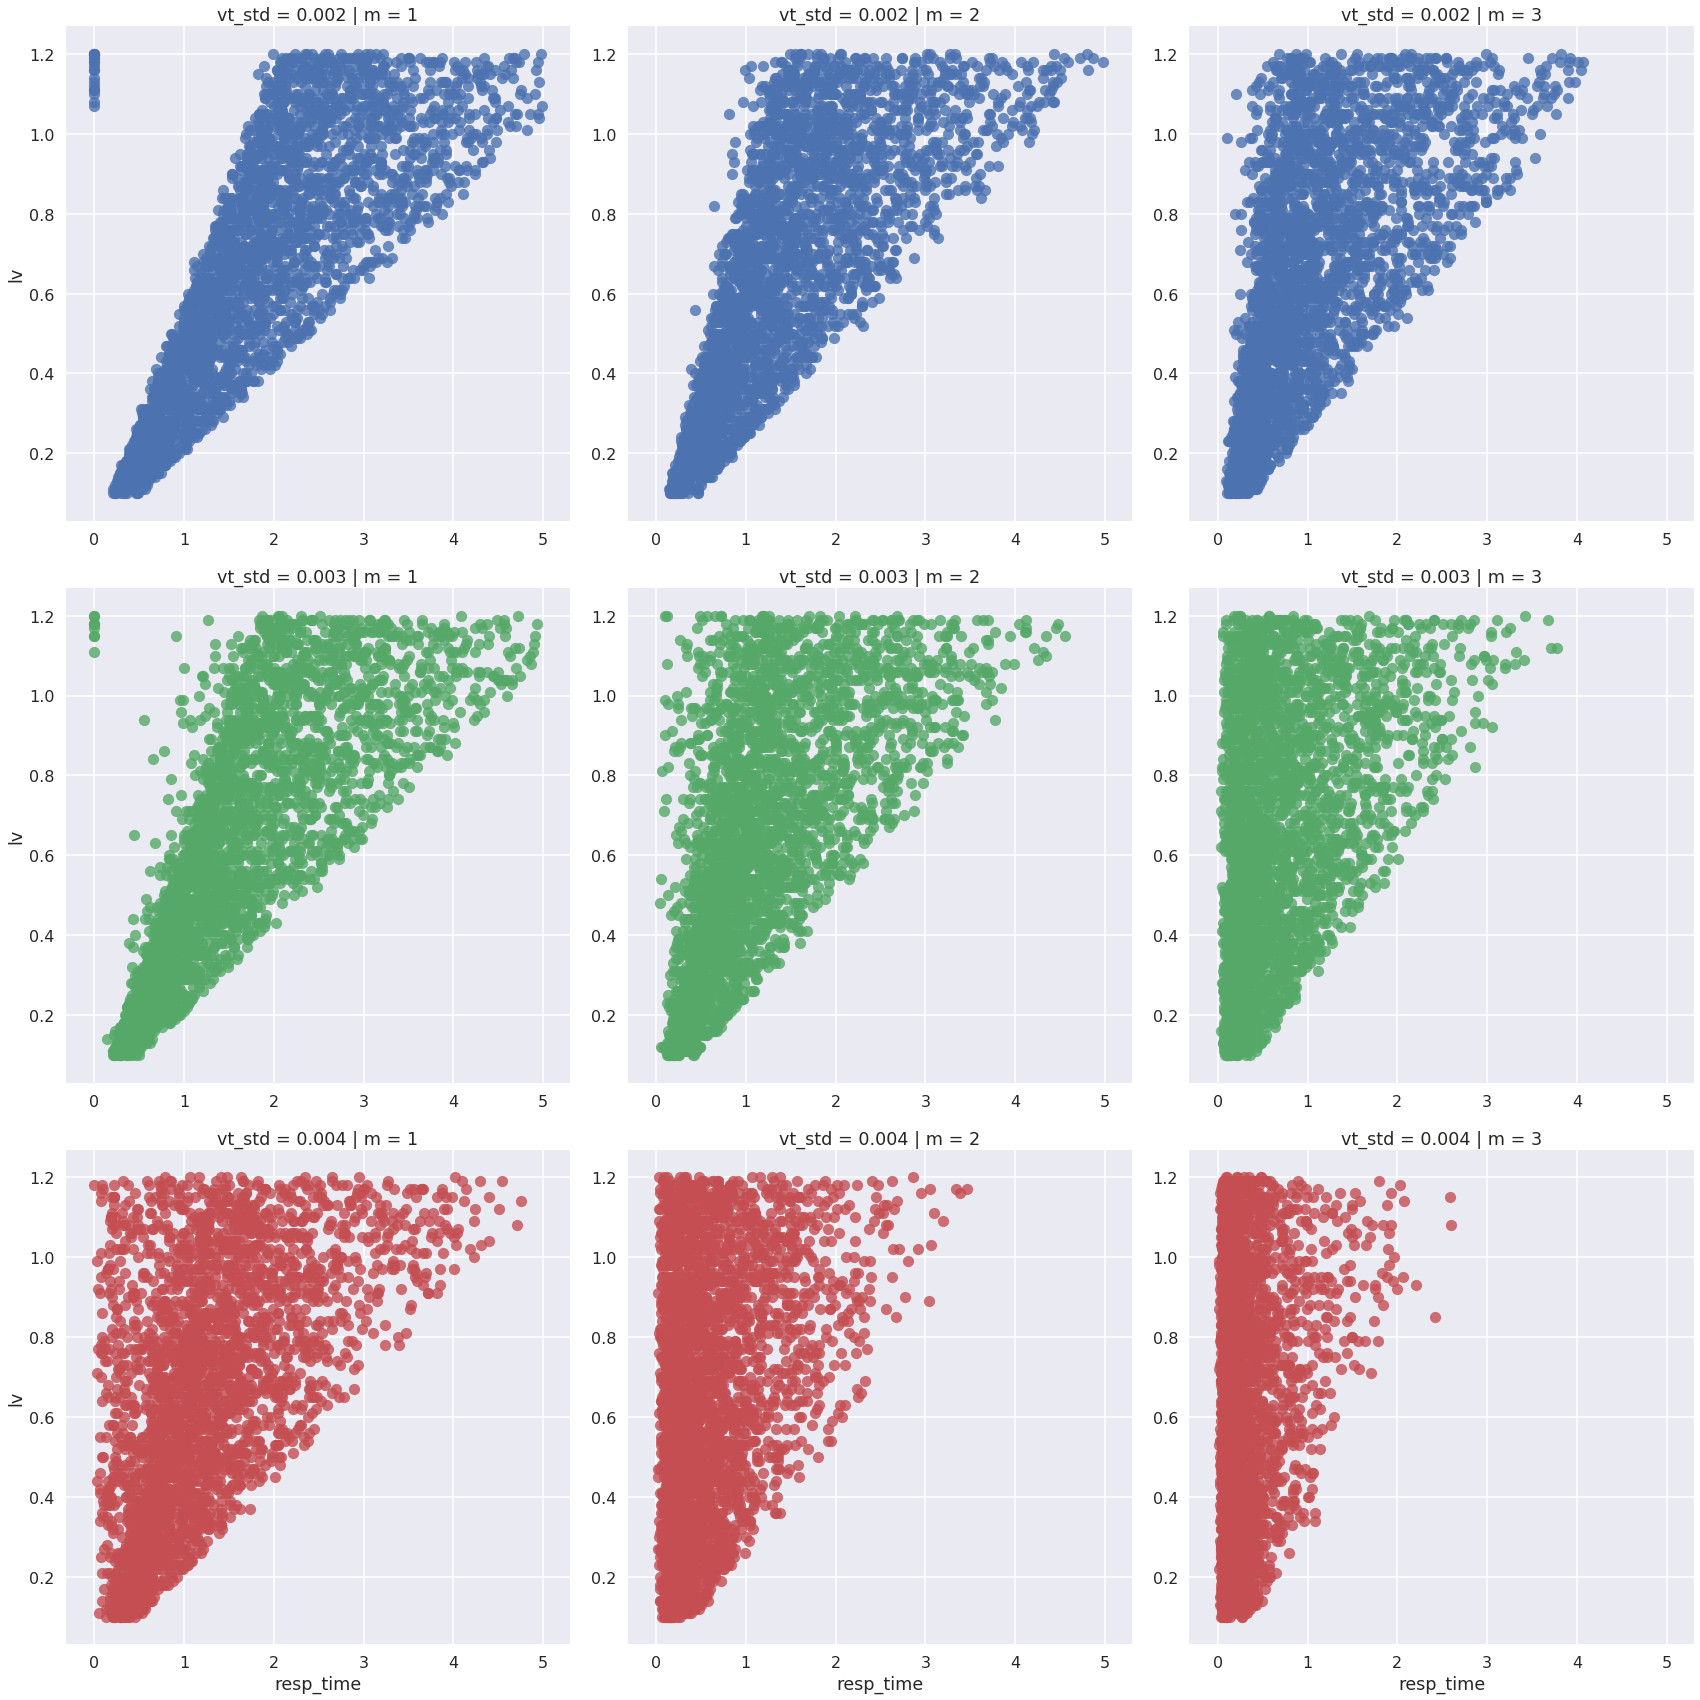

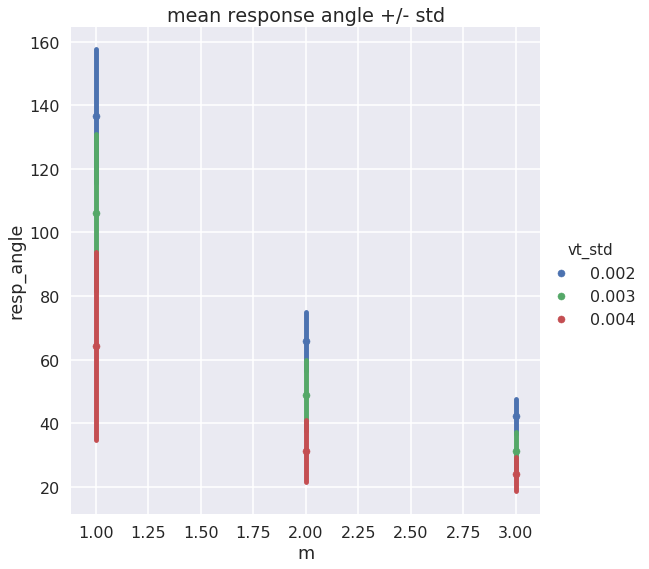

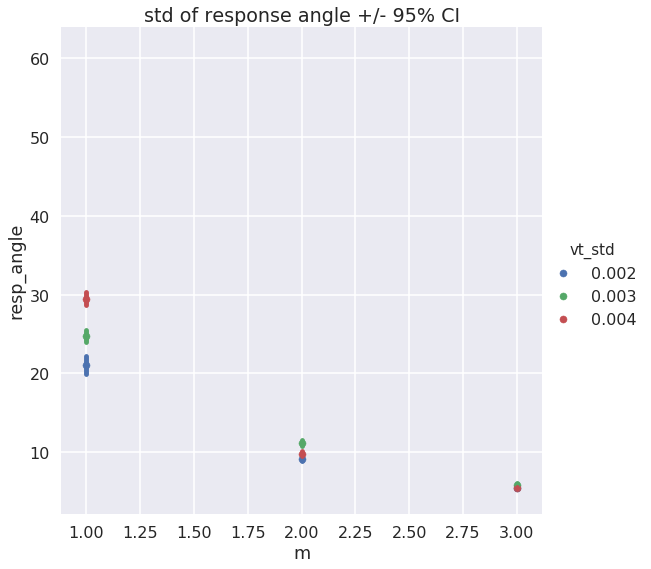

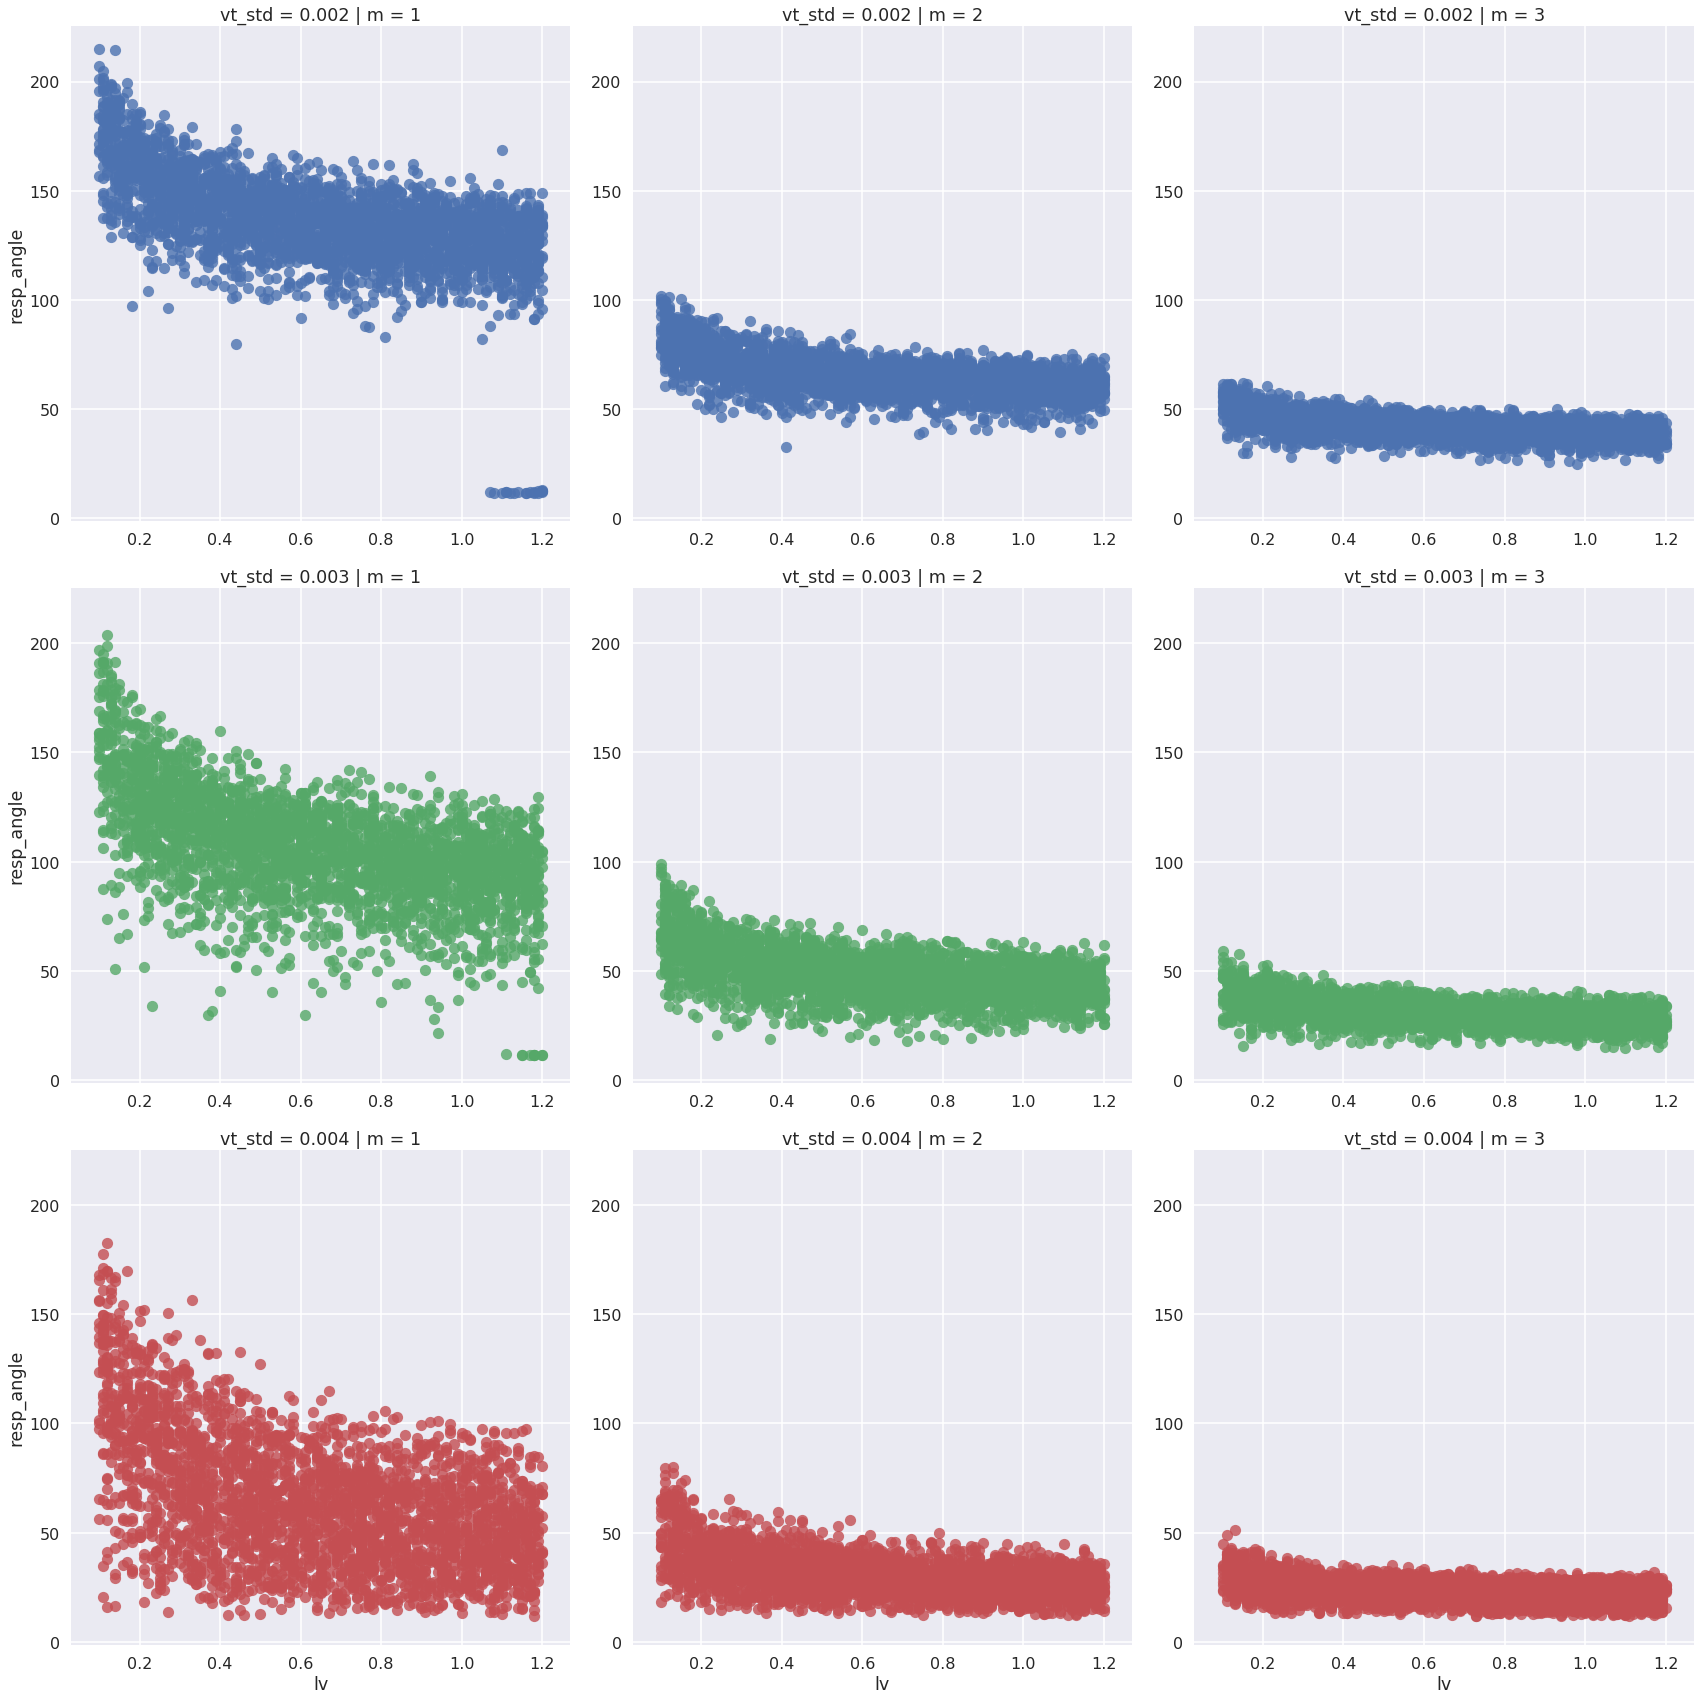

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


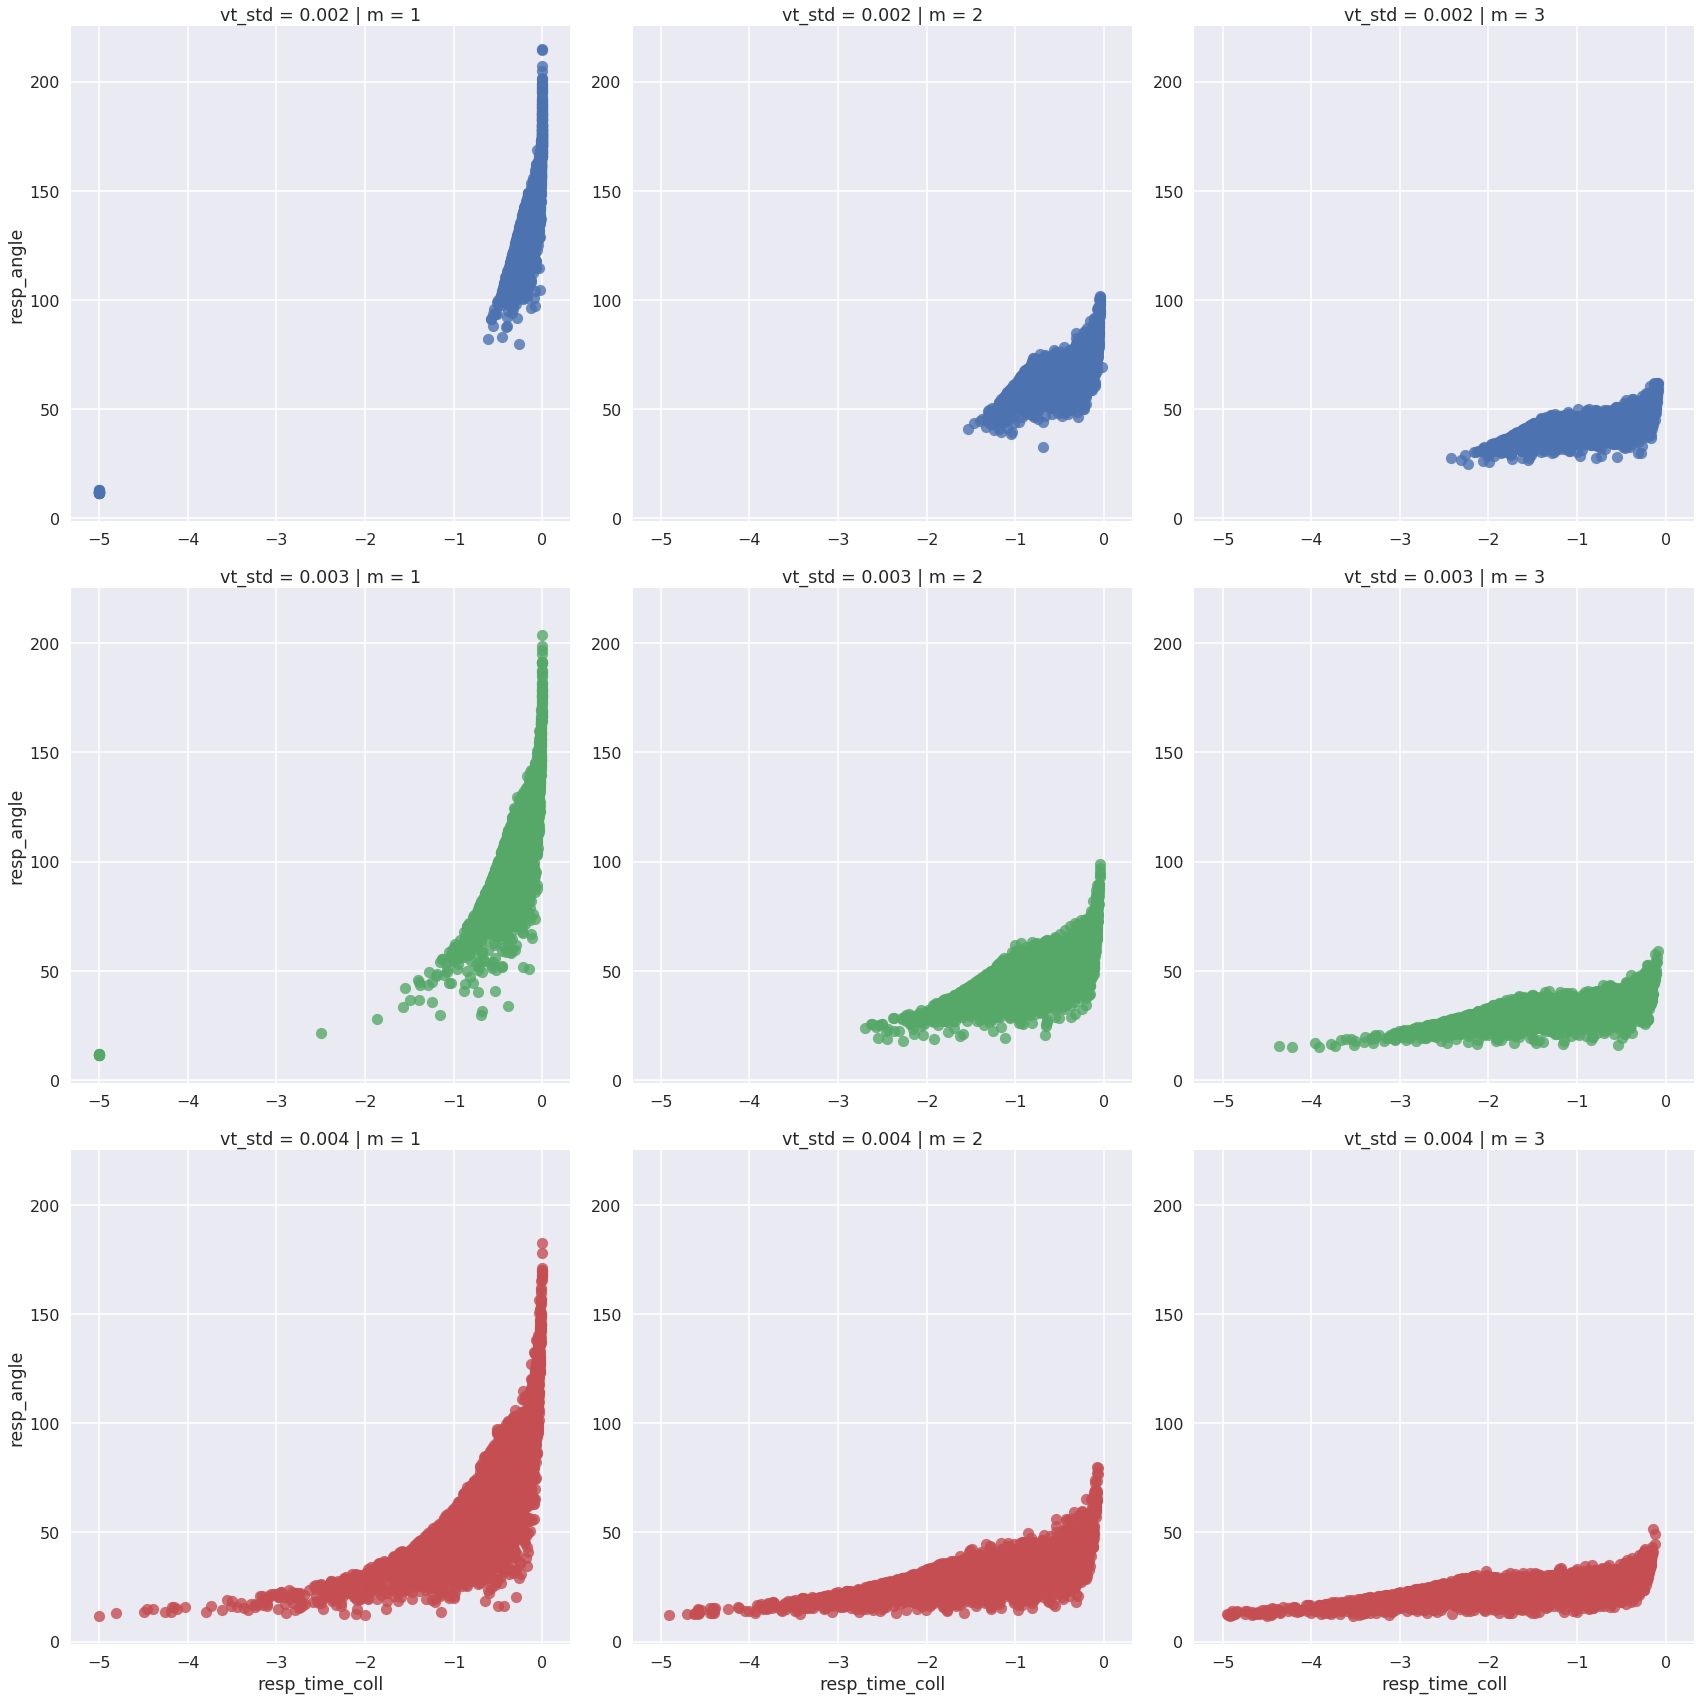

In [21]:
df_vt_noise = pd.DataFrame(data_dict)
sns.set('poster')
g = sns.lmplot(x='resp_dist', y='lv', col='m', row='vt_std', hue='vt_std', data=df_vt_noise, fit_reg=False, size=8)
g = sns.lmplot(x='resp_time', y='lv', col='m', row='vt_std', hue='vt_std', data=df_vt_noise, fit_reg=False, size=8)
g = sns.lmplot(x='m', y='resp_angle', hue='vt_std', data=df_vt_noise, fit_reg=False, size=8, x_estimator=np.mean, x_ci='sd')
plt.title('mean response angle +/- std')
g = sns.lmplot(x='m', y='resp_angle', hue='vt_std', data=df_vt_noise, fit_reg=False, size=8, x_estimator=np.std, x_ci='ci')
plt.title('std of response angle +/- 95% CI')
g = sns.lmplot(x='lv', y='resp_angle', hue='vt_std', row='vt_std', col='m', data=df_vt_noise, fit_reg=False, size=8)
g = sns.lmplot(x='lv', y='resp_time_coll', hue='vt_std', row='vt_std', col='m', data=df_vt_noise, fit_reg=True, size=8)
g = sns.lmplot(x='resp_time_coll', y='lv', hue='vt_std', row='vt_std', col='m', data=df_vt_noise, fit_reg=False, size=8)
g = sns.lmplot(x='resp_time_coll', y='resp_angle', hue='vt_std', row='vt_std', col='m', data=df_vt_noise,
               fit_reg=False, size=8)

In [22]:
df_vt_noise['lv_grouped'] = df_vt_noise['lv'].map(md.lv_map)
grouped = df_vt_noise.groupby(['m', 'b', 'vt_std', 'lv_grouped'], as_index=False)
df_vt_noise_means = grouped.agg({'resp_dist': np.mean,
                     'resp_time': np.mean,
                     'resp_angle': np.mean,
                     'resp_time_coll': np.mean})

df_vt_noise_stds = grouped.agg({'resp_dist': np.std,
                     'resp_time': np.std,
                     'resp_angle': np.std,
                     'resp_time_coll': np.std})

In [23]:
binsize = 1.1/6
np.arange(start=0.1+binsize/2, stop=1.2, step=binsize)

array([ 0.19166667,  0.375     ,  0.55833333,  0.74166667,  0.925     ,
        1.10833333])

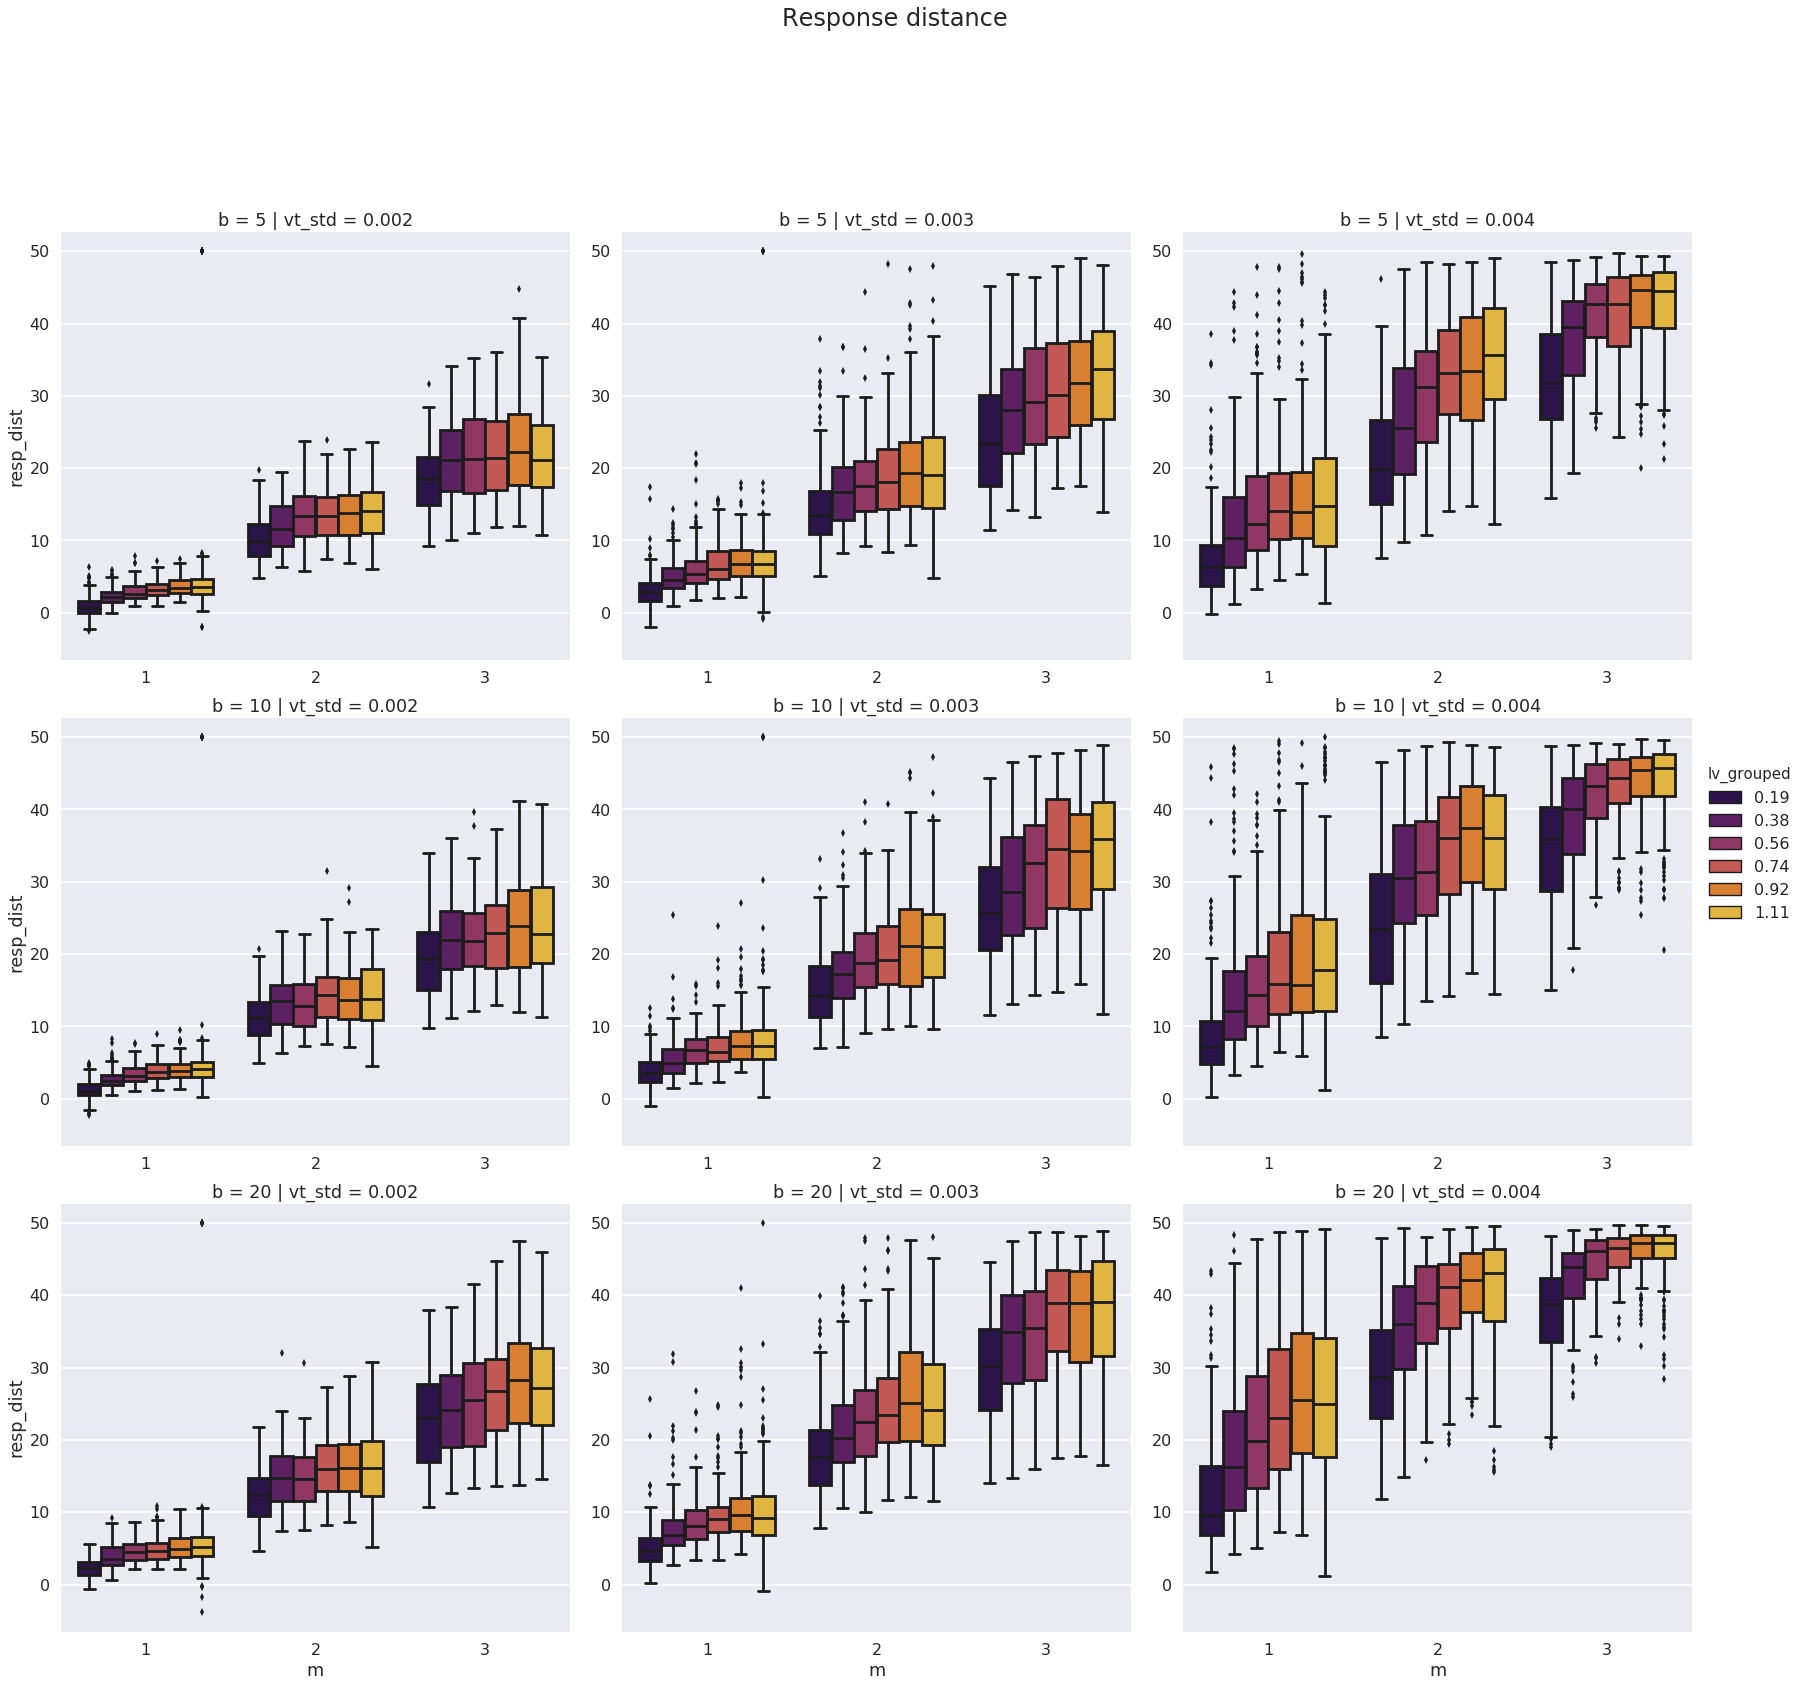

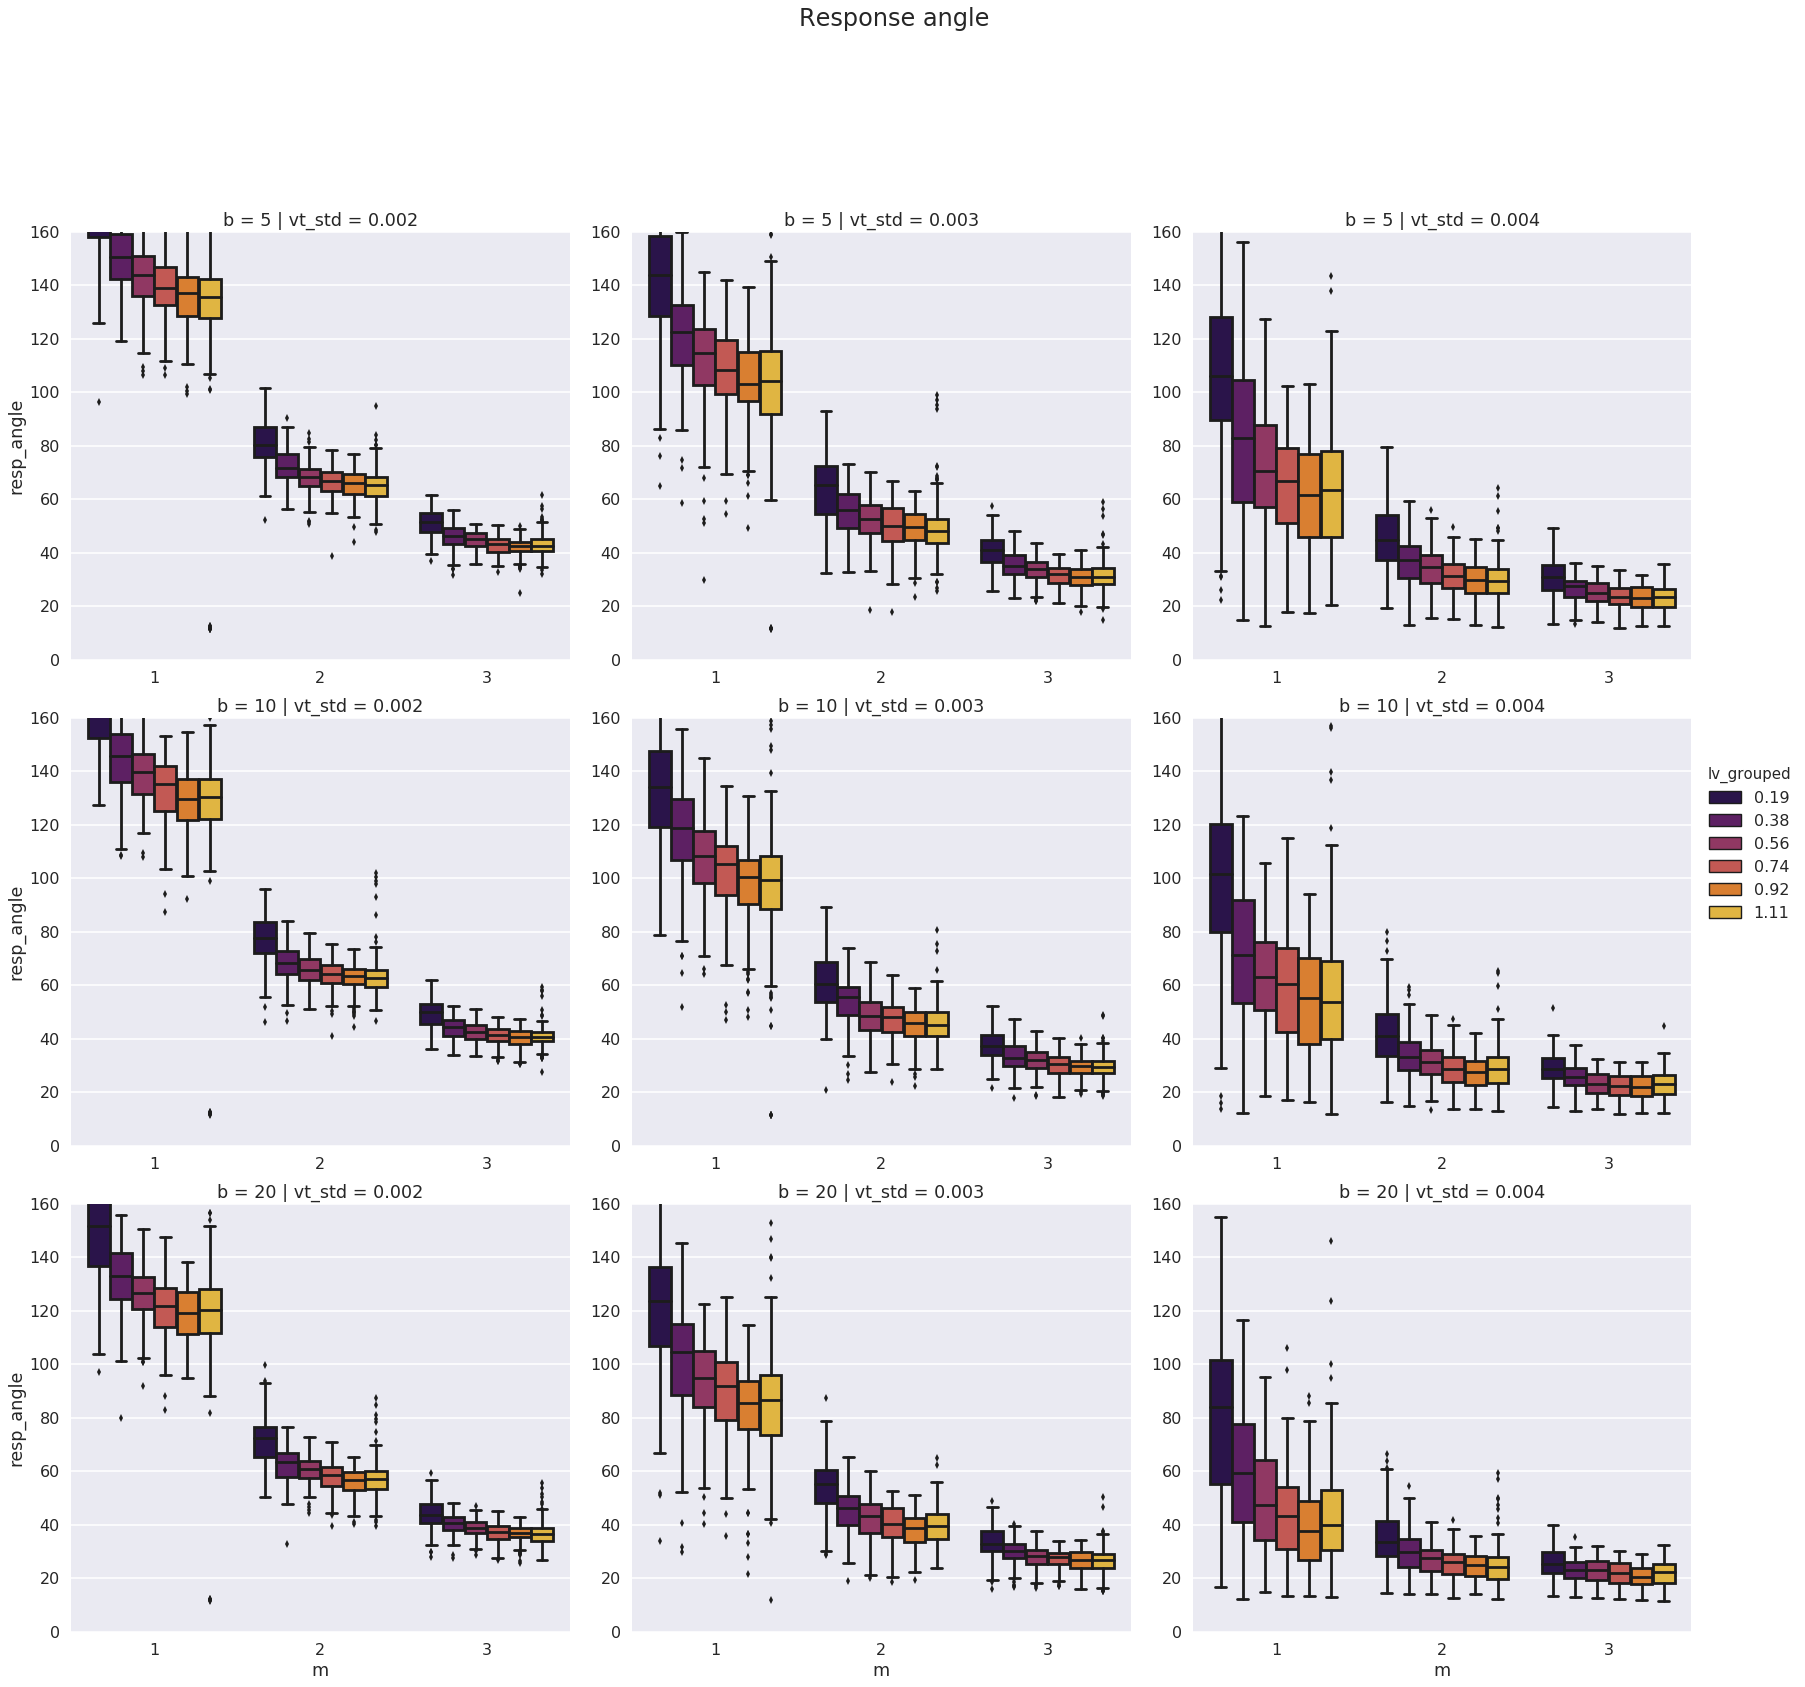

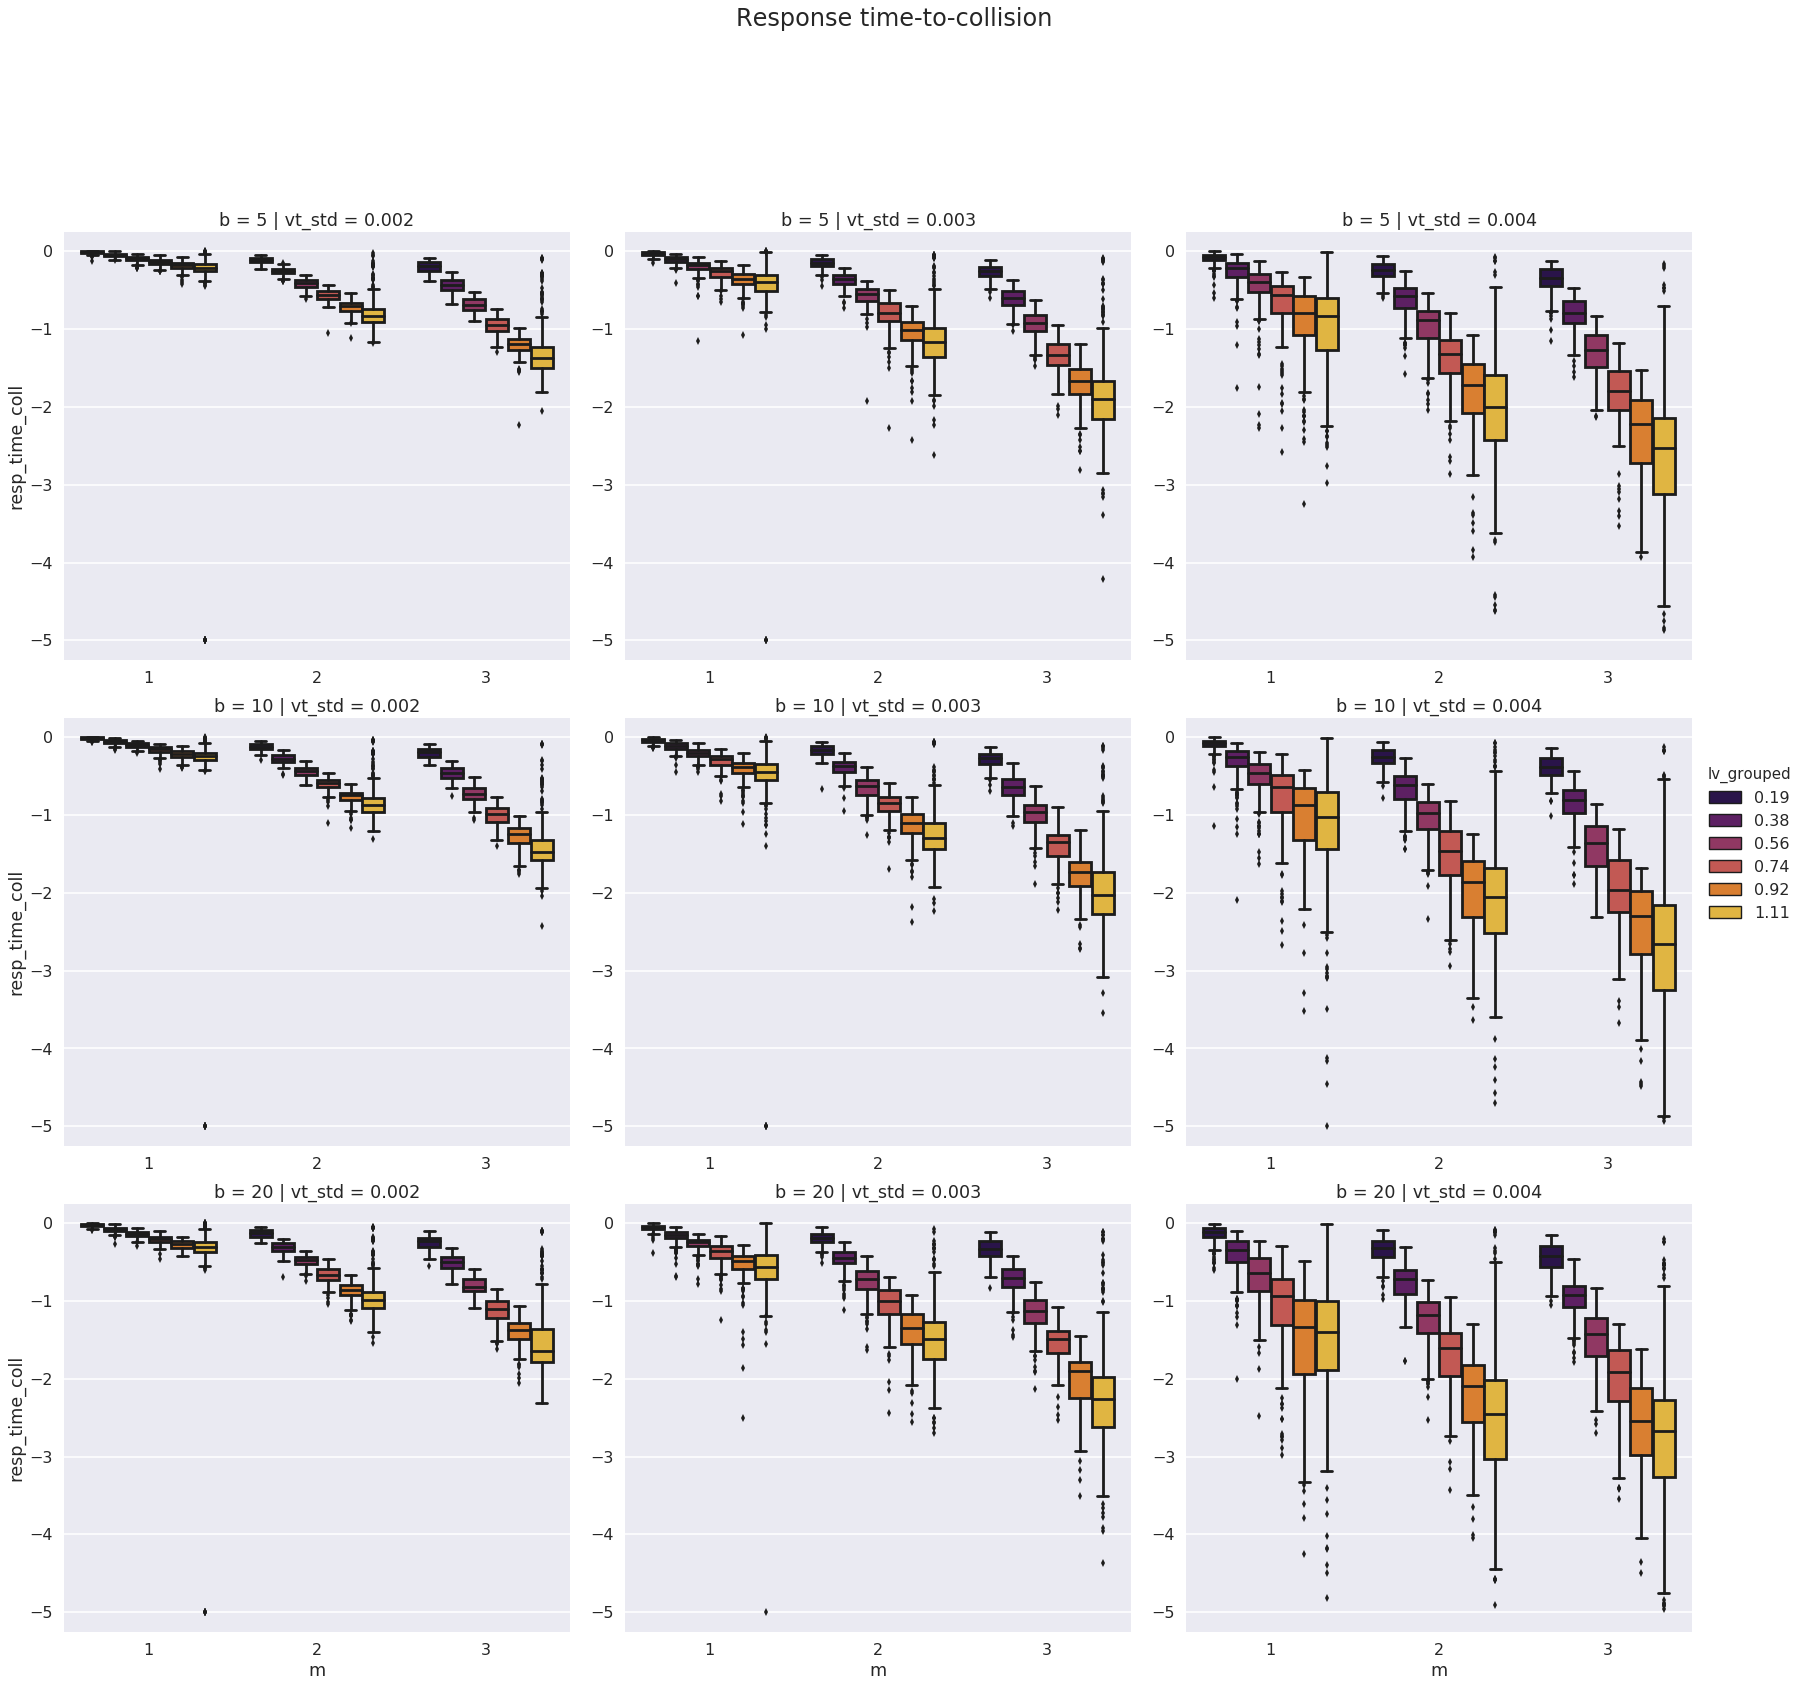

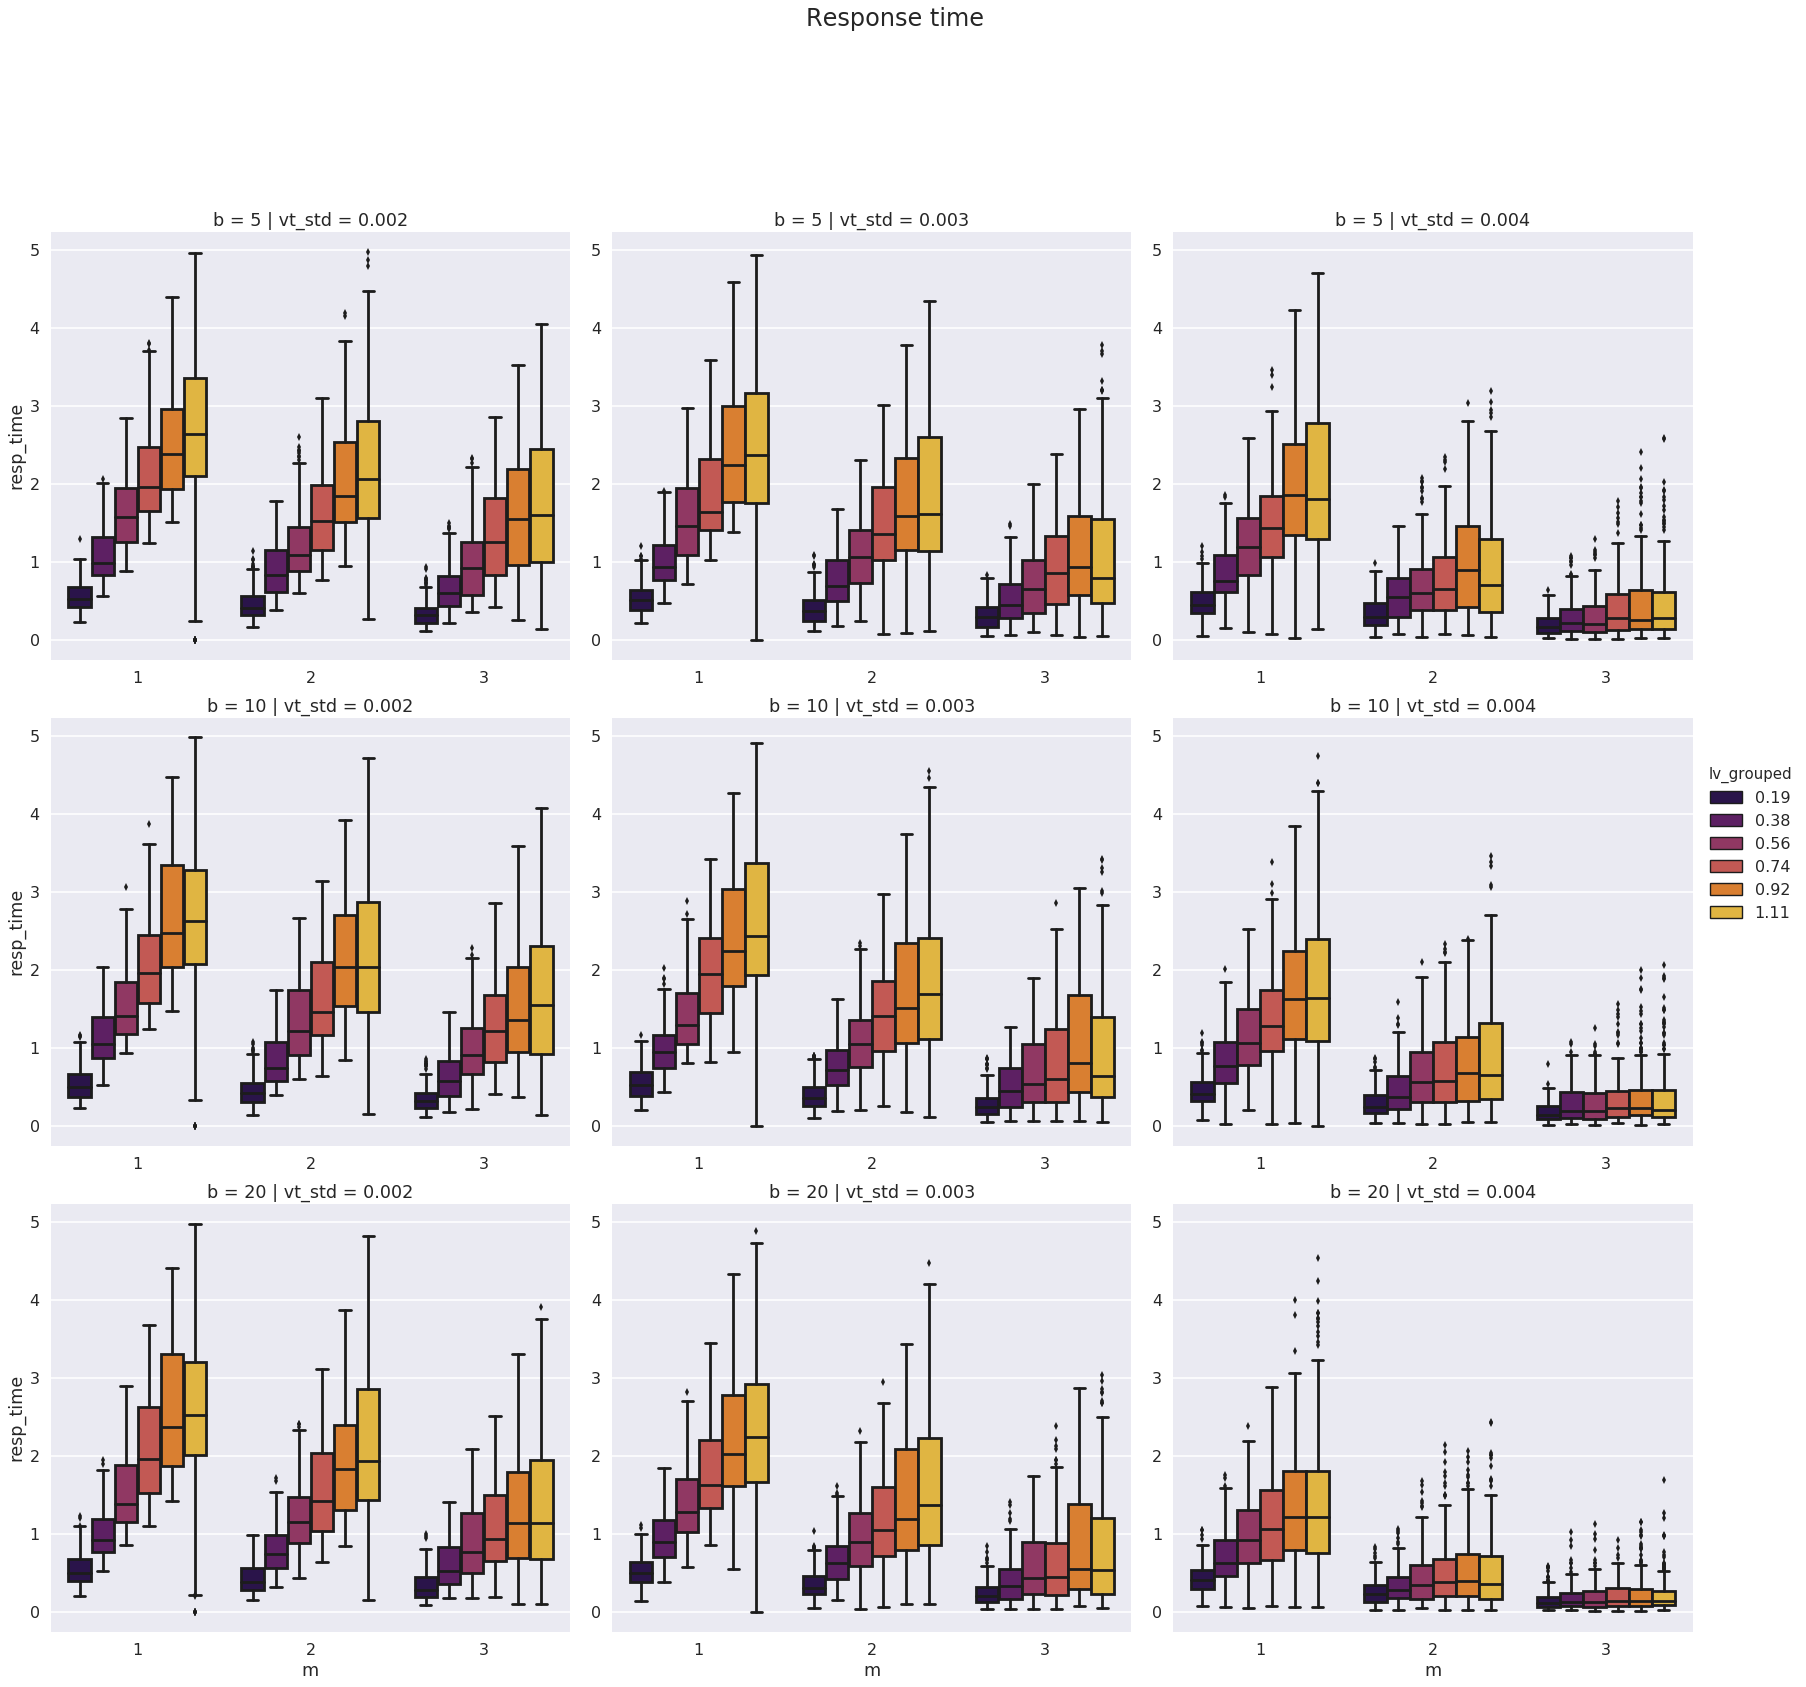

In [24]:
sns.set('poster')
g = sns.factorplot(x='m', y='resp_dist', col='vt_std', row='b', hue='lv_grouped', data=df_vt_noise, size=8, aspect=1,
               palette='inferno', kind='box')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Response distance', fontsize=24)
g.savefig('resp_dist_boxplots.pdf')

g = sns.factorplot(x='m', y='resp_angle', col='vt_std', row='b', hue='lv_grouped', data=df_vt_noise, size=8, aspect=1,
               palette='inferno', kind='box')
plt.ylim([0, 160])
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Response angle', fontsize=24)
g.savefig('resp_angle_boxplots.pdf')

g = sns.factorplot(x='m', y='resp_time_coll', col='vt_std', row='b', hue='lv_grouped', data=df_vt_noise, size=8, aspect=1,
               palette='inferno', kind='box')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Response time-to-collision', fontsize=24)
g.savefig('resp_time_coll_boxplots.pdf')

g = sns.factorplot(x='m', y='resp_time', col='vt_std', row='b', hue='lv_grouped', data=df_vt_noise, size=8, aspect=1,
               palette='inferno', kind='box')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Response time', fontsize=24)
g.savefig('resp_time_boxplots.pdf')

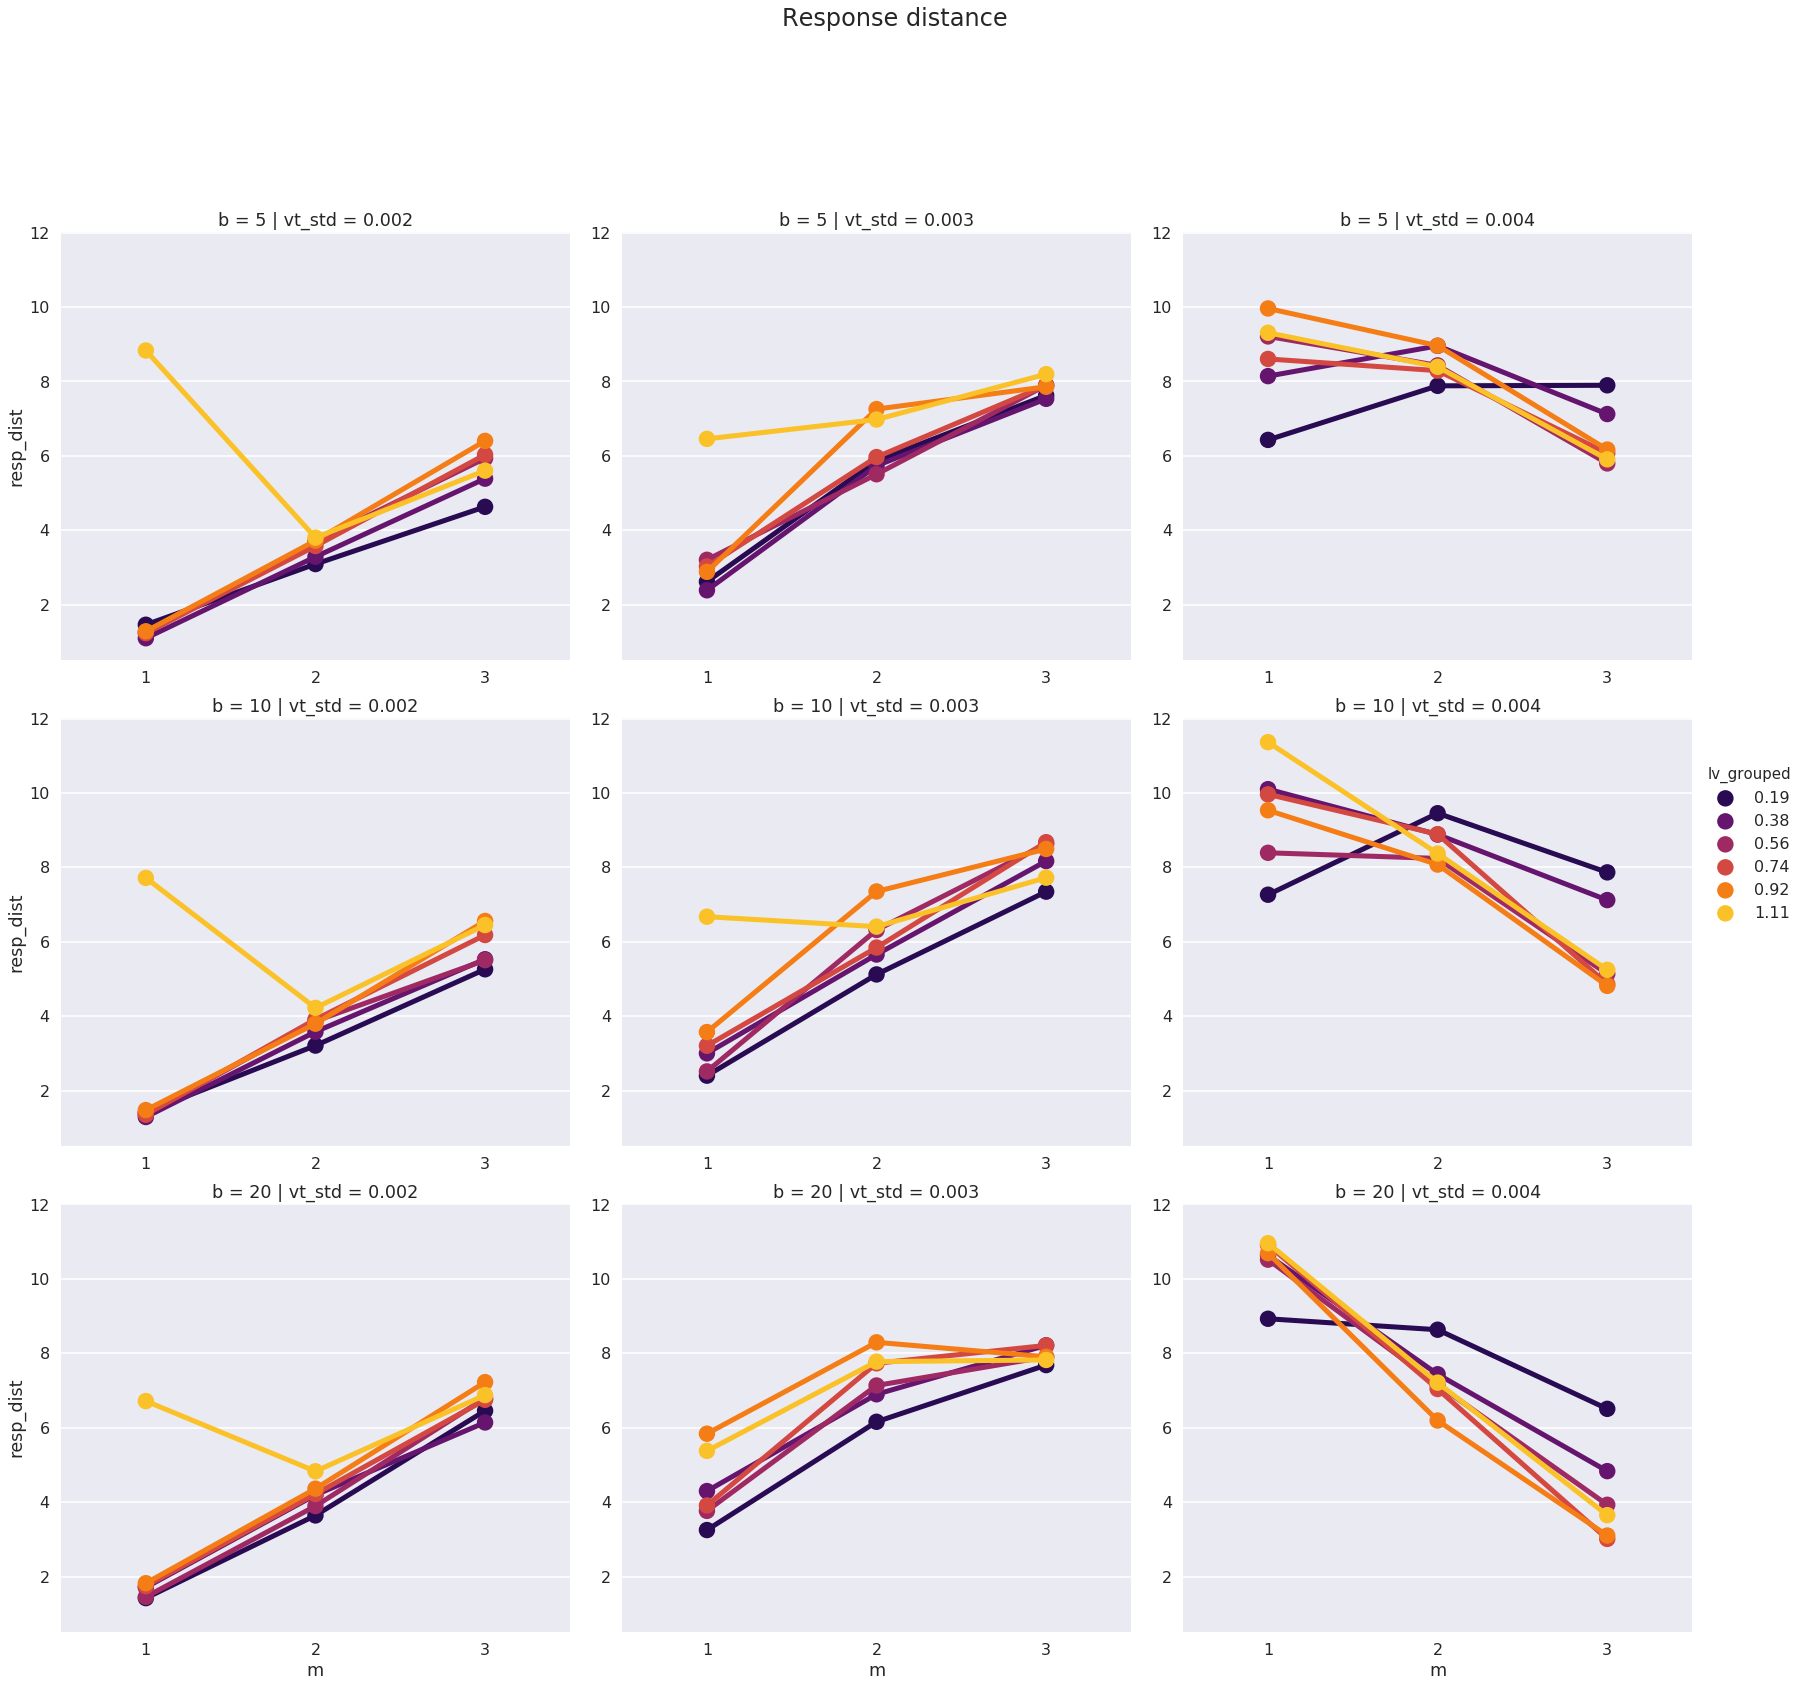

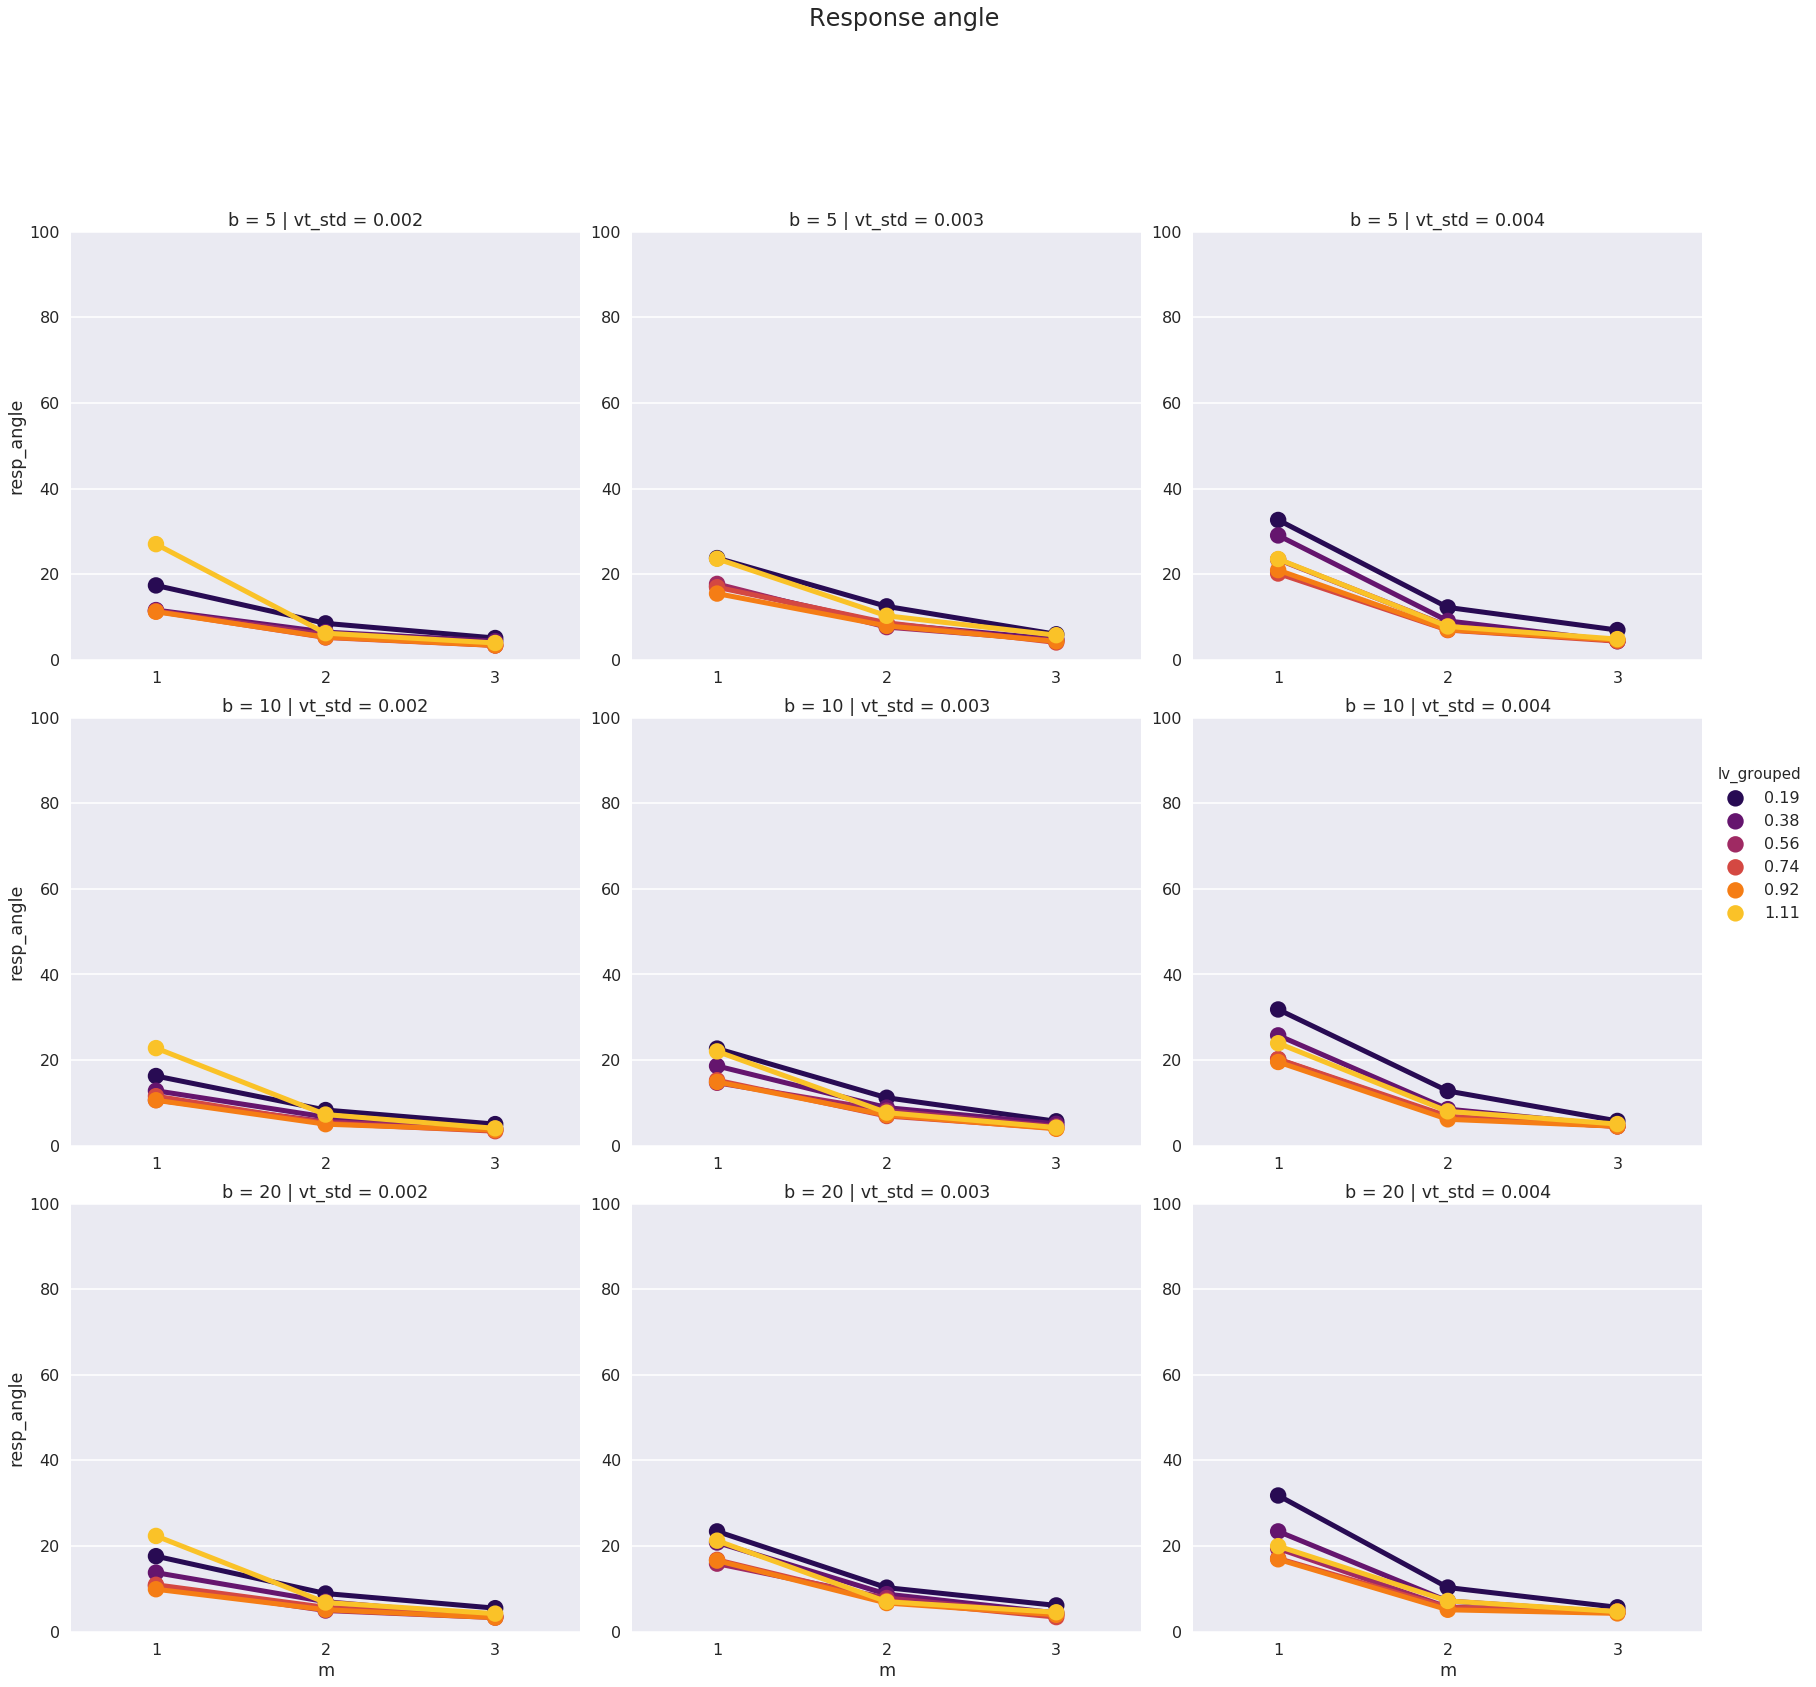

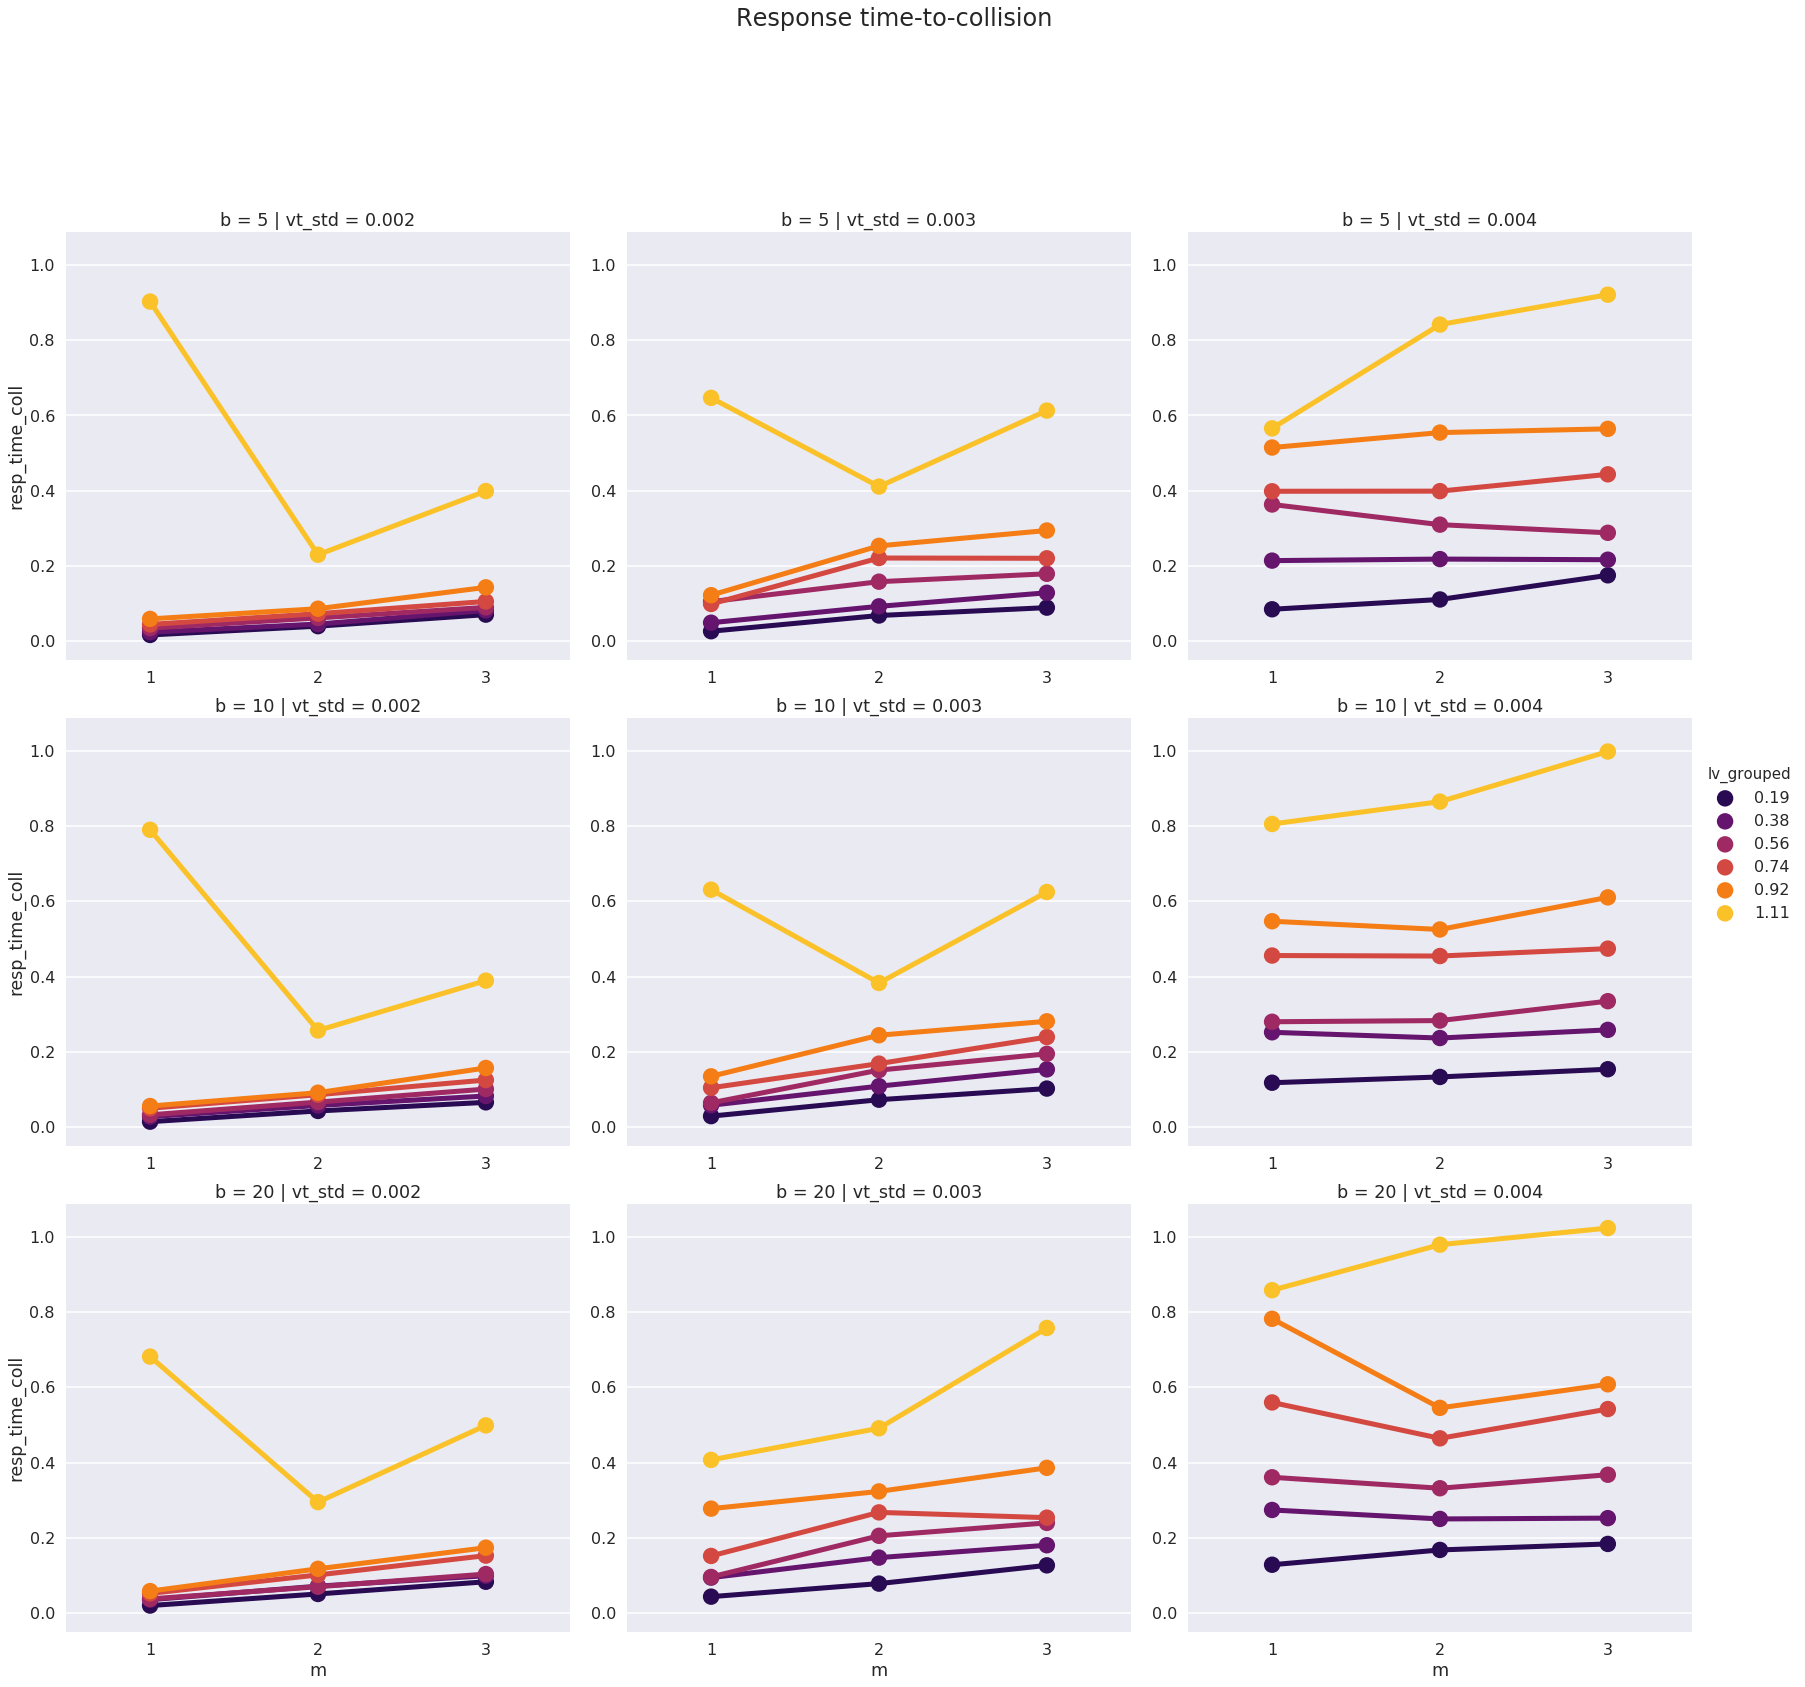

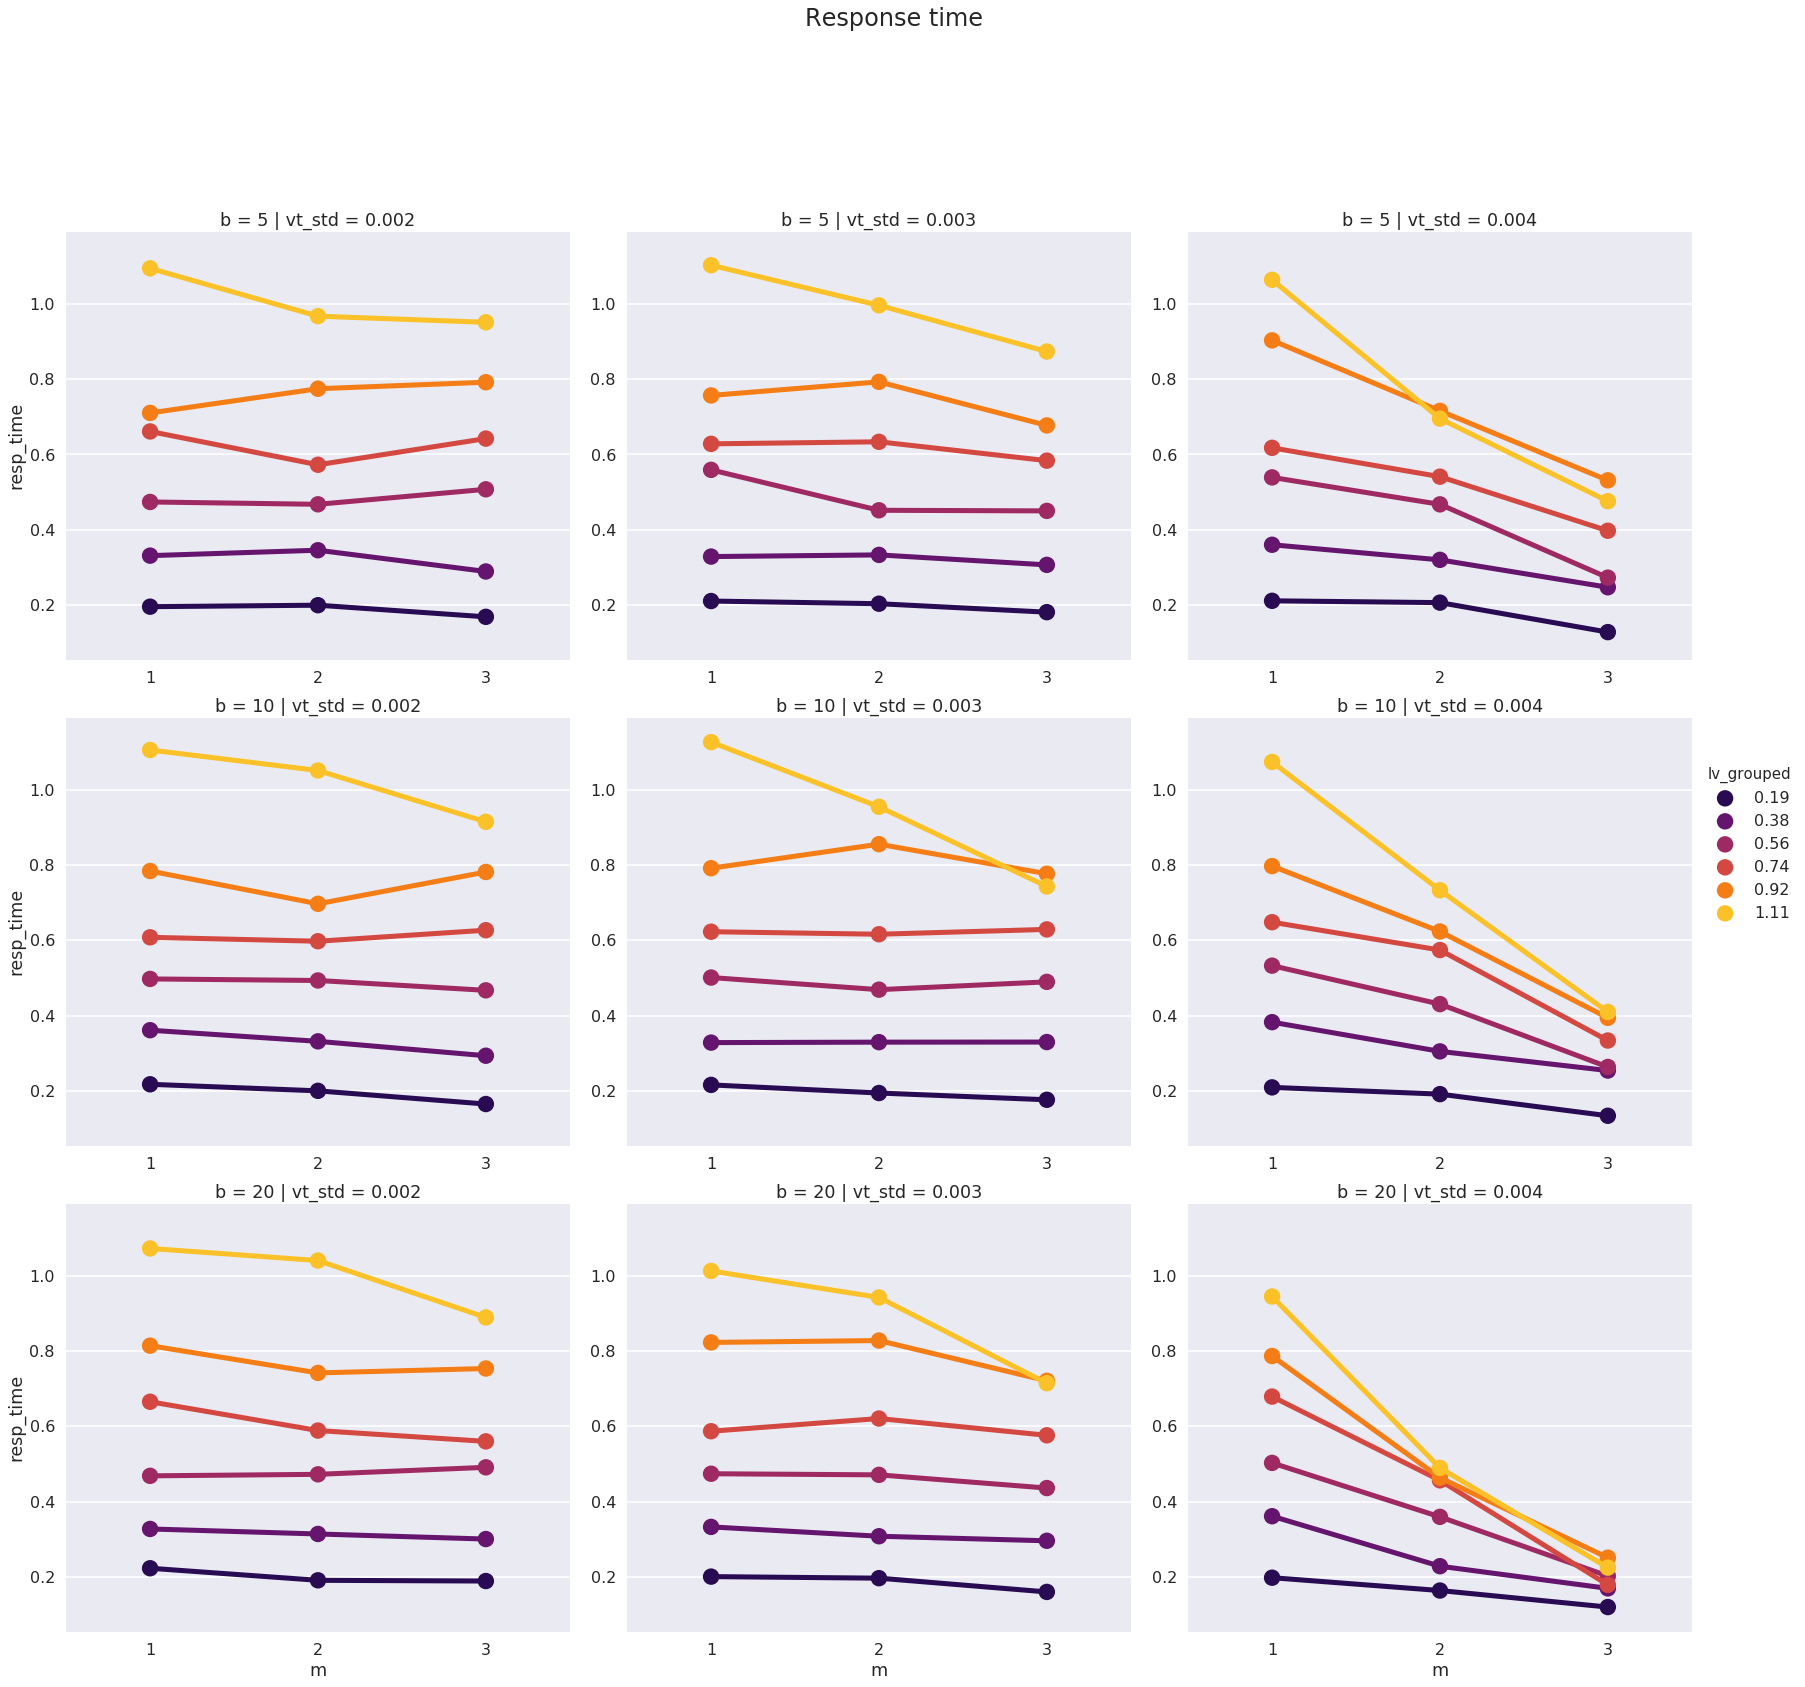

In [25]:
sns.set('poster')
g = sns.factorplot(x='m', y='resp_dist', col='vt_std', row='b', hue='lv_grouped', data=df_vt_noise_stds, size=8, aspect=1,
               palette='inferno', kind='point')
g.set_axis_labels()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Response distance', fontsize=24)
g.savefig('resp_dist_stds.pdf')

g = sns.factorplot(x='m', y='resp_angle', col='vt_std', row='b', hue='lv_grouped', data=df_vt_noise_stds, size=8, aspect=1,
               palette='inferno', kind='point')
plt.ylim([0, 100])
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Response angle', fontsize=24)
g.savefig('resp_angle_stds.pdf')

g = sns.factorplot(x='m', y='resp_time_coll', col='vt_std', row='b', hue='lv_grouped', data=df_vt_noise_stds, size=8, aspect=1,
               palette='inferno', kind='point')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Response time-to-collision', fontsize=24)
g.savefig('resp_time_coll_stds.pdf')

g = sns.factorplot(x='m', y='resp_time', col='vt_std', row='b', hue='lv_grouped', data=df_vt_noise_stds, size=8, aspect=1,
               palette='inferno', kind='point')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Response time', fontsize=24)
g.savefig('resp_time_stds.pdf')

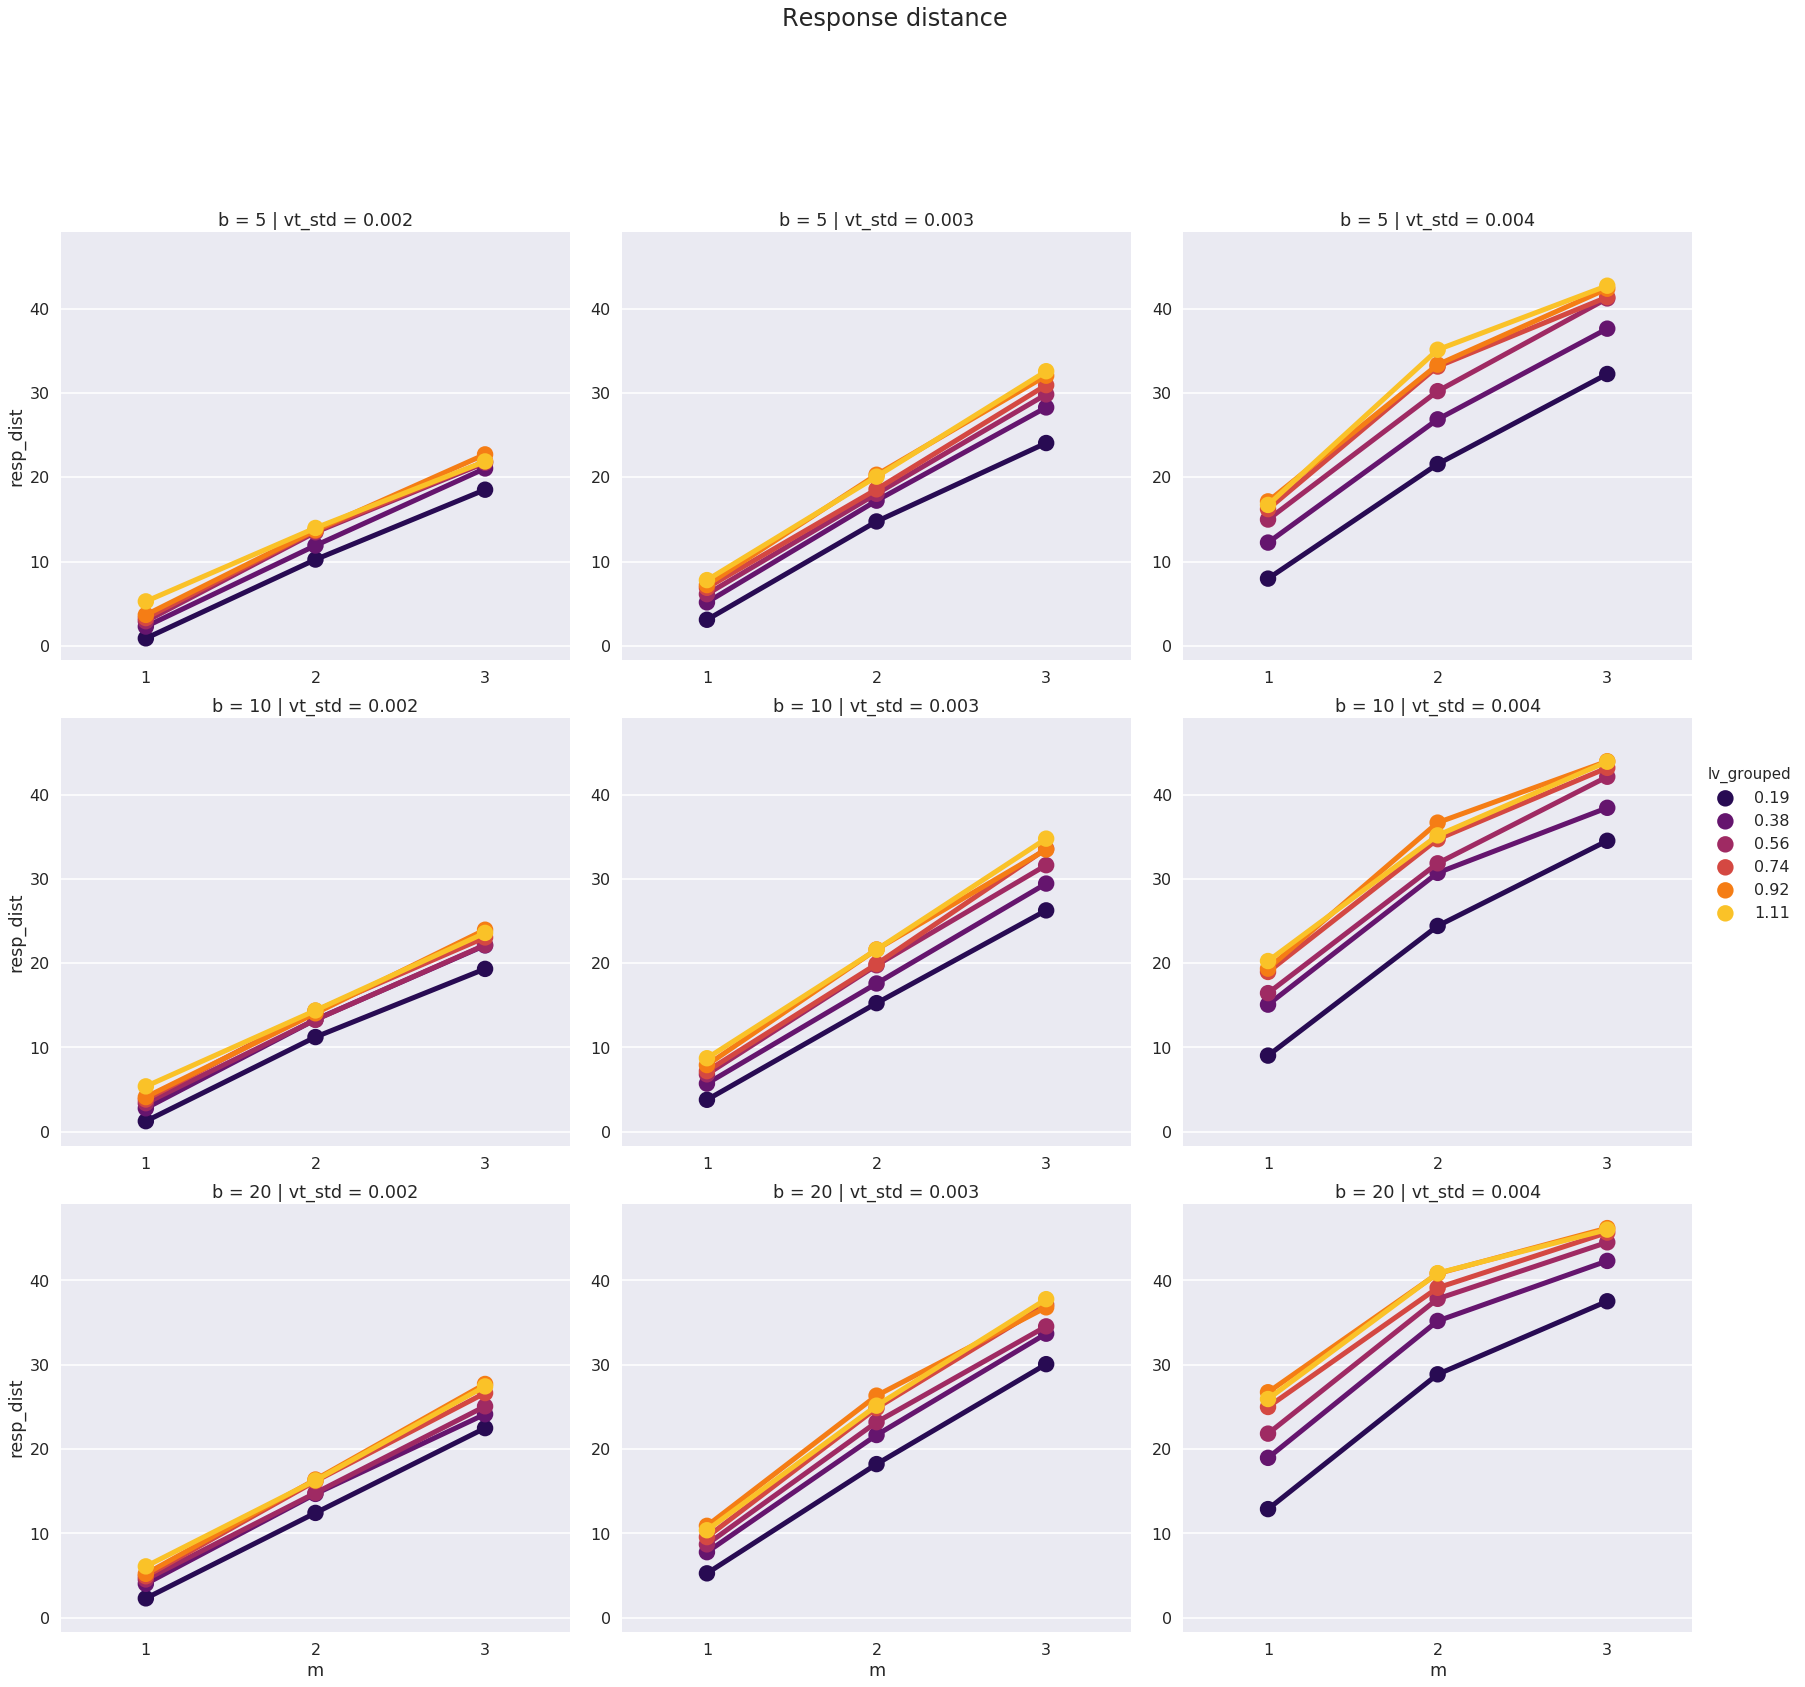

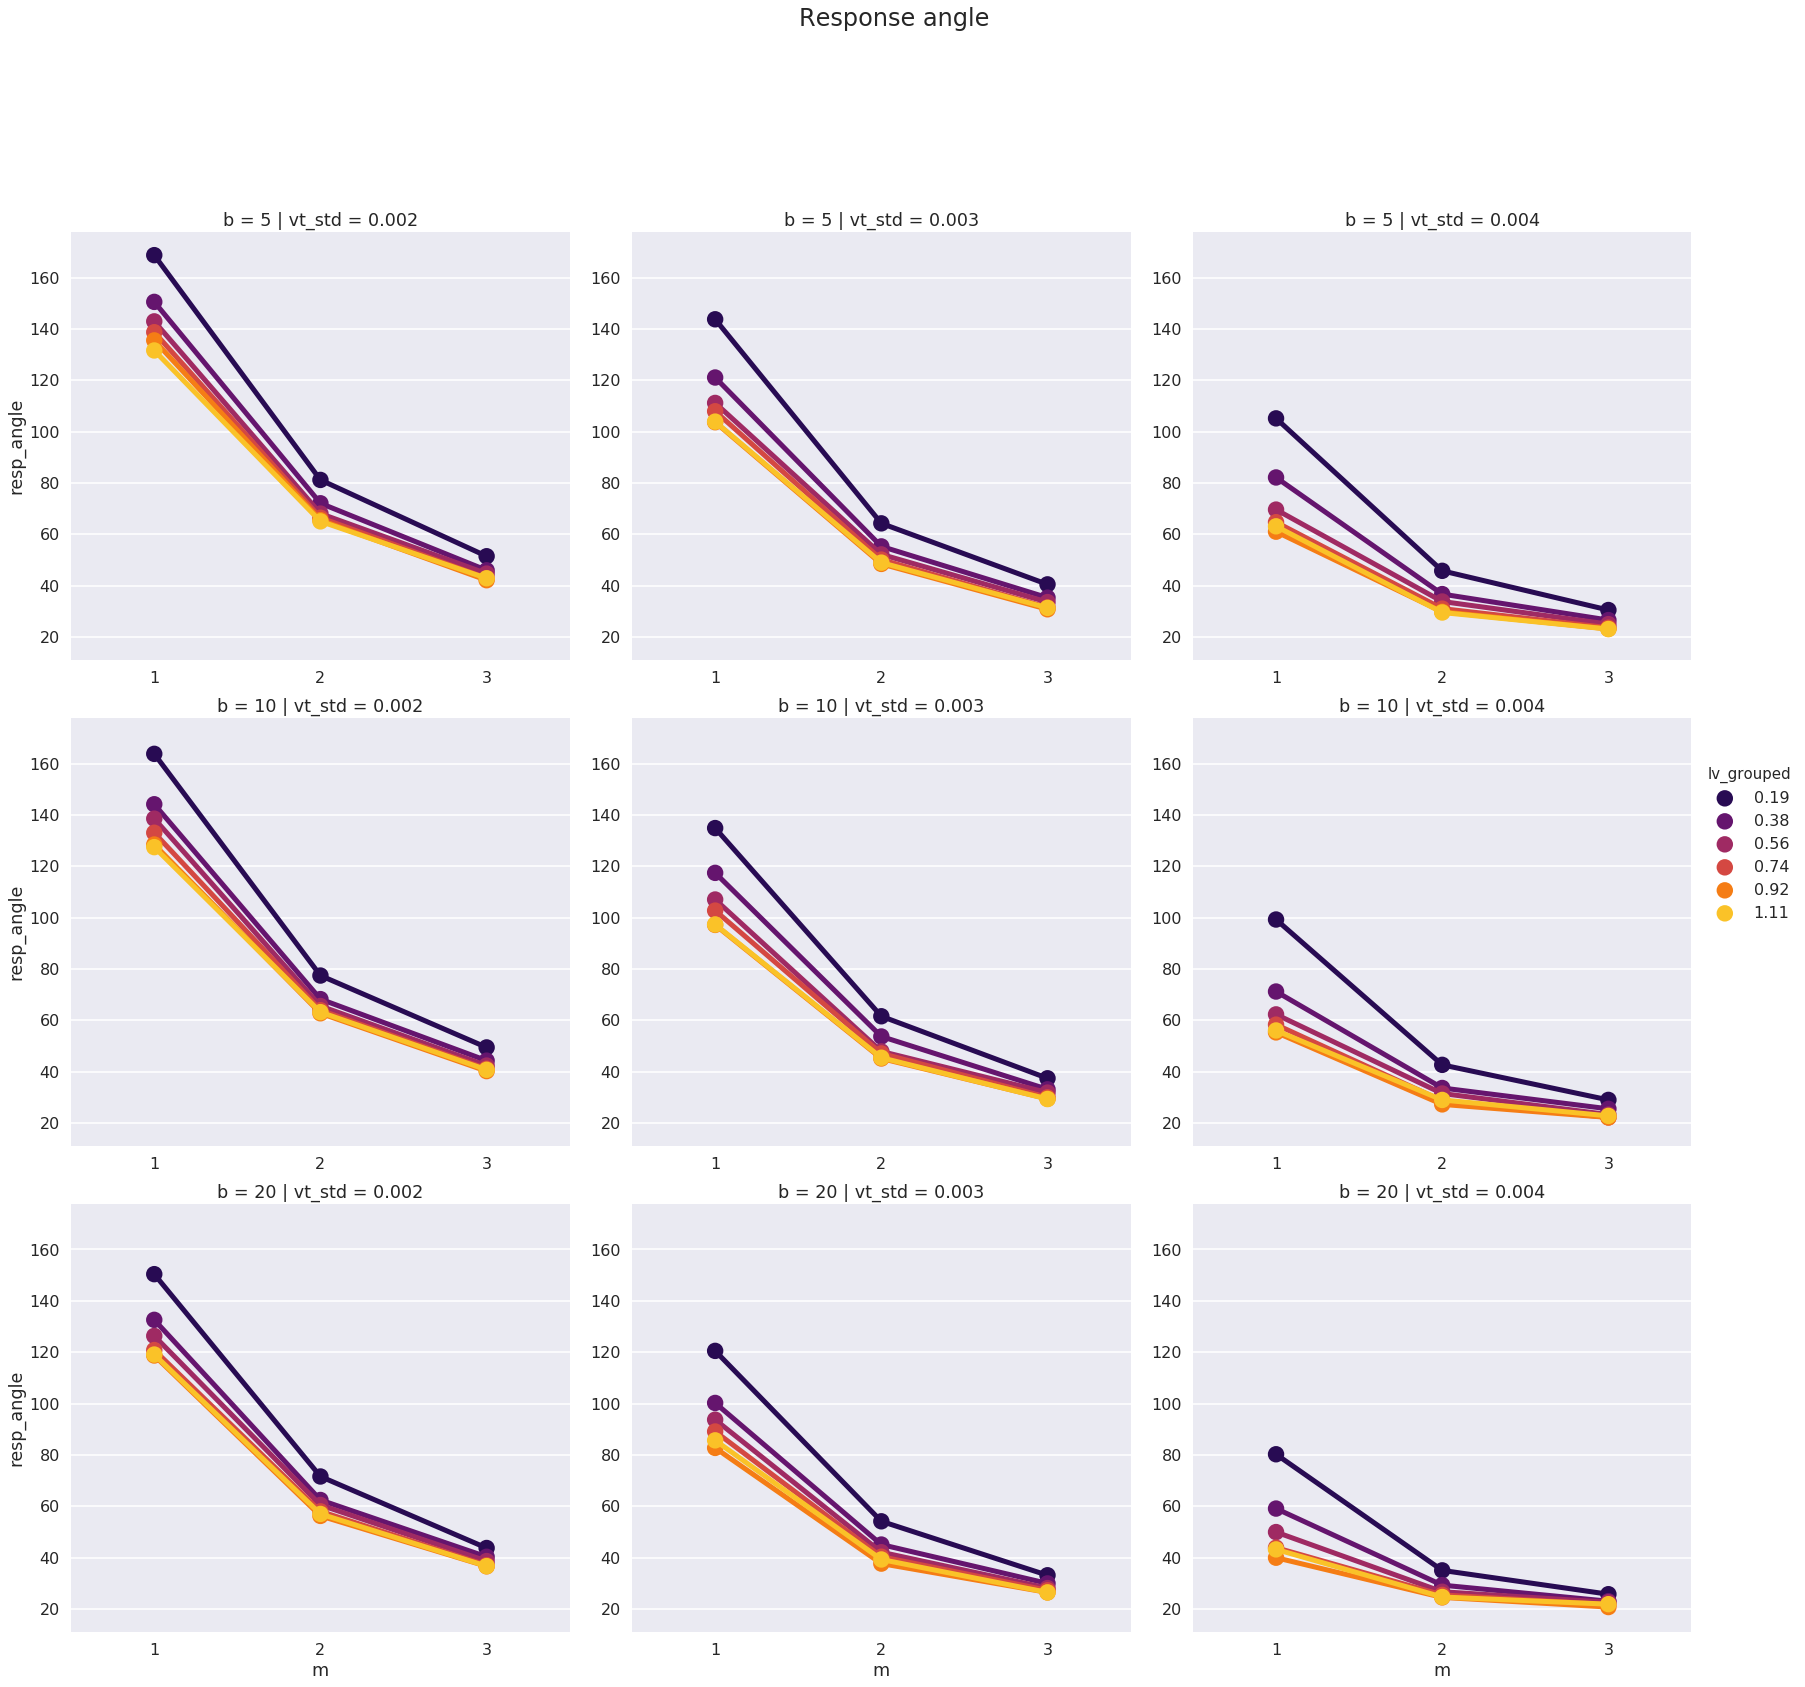

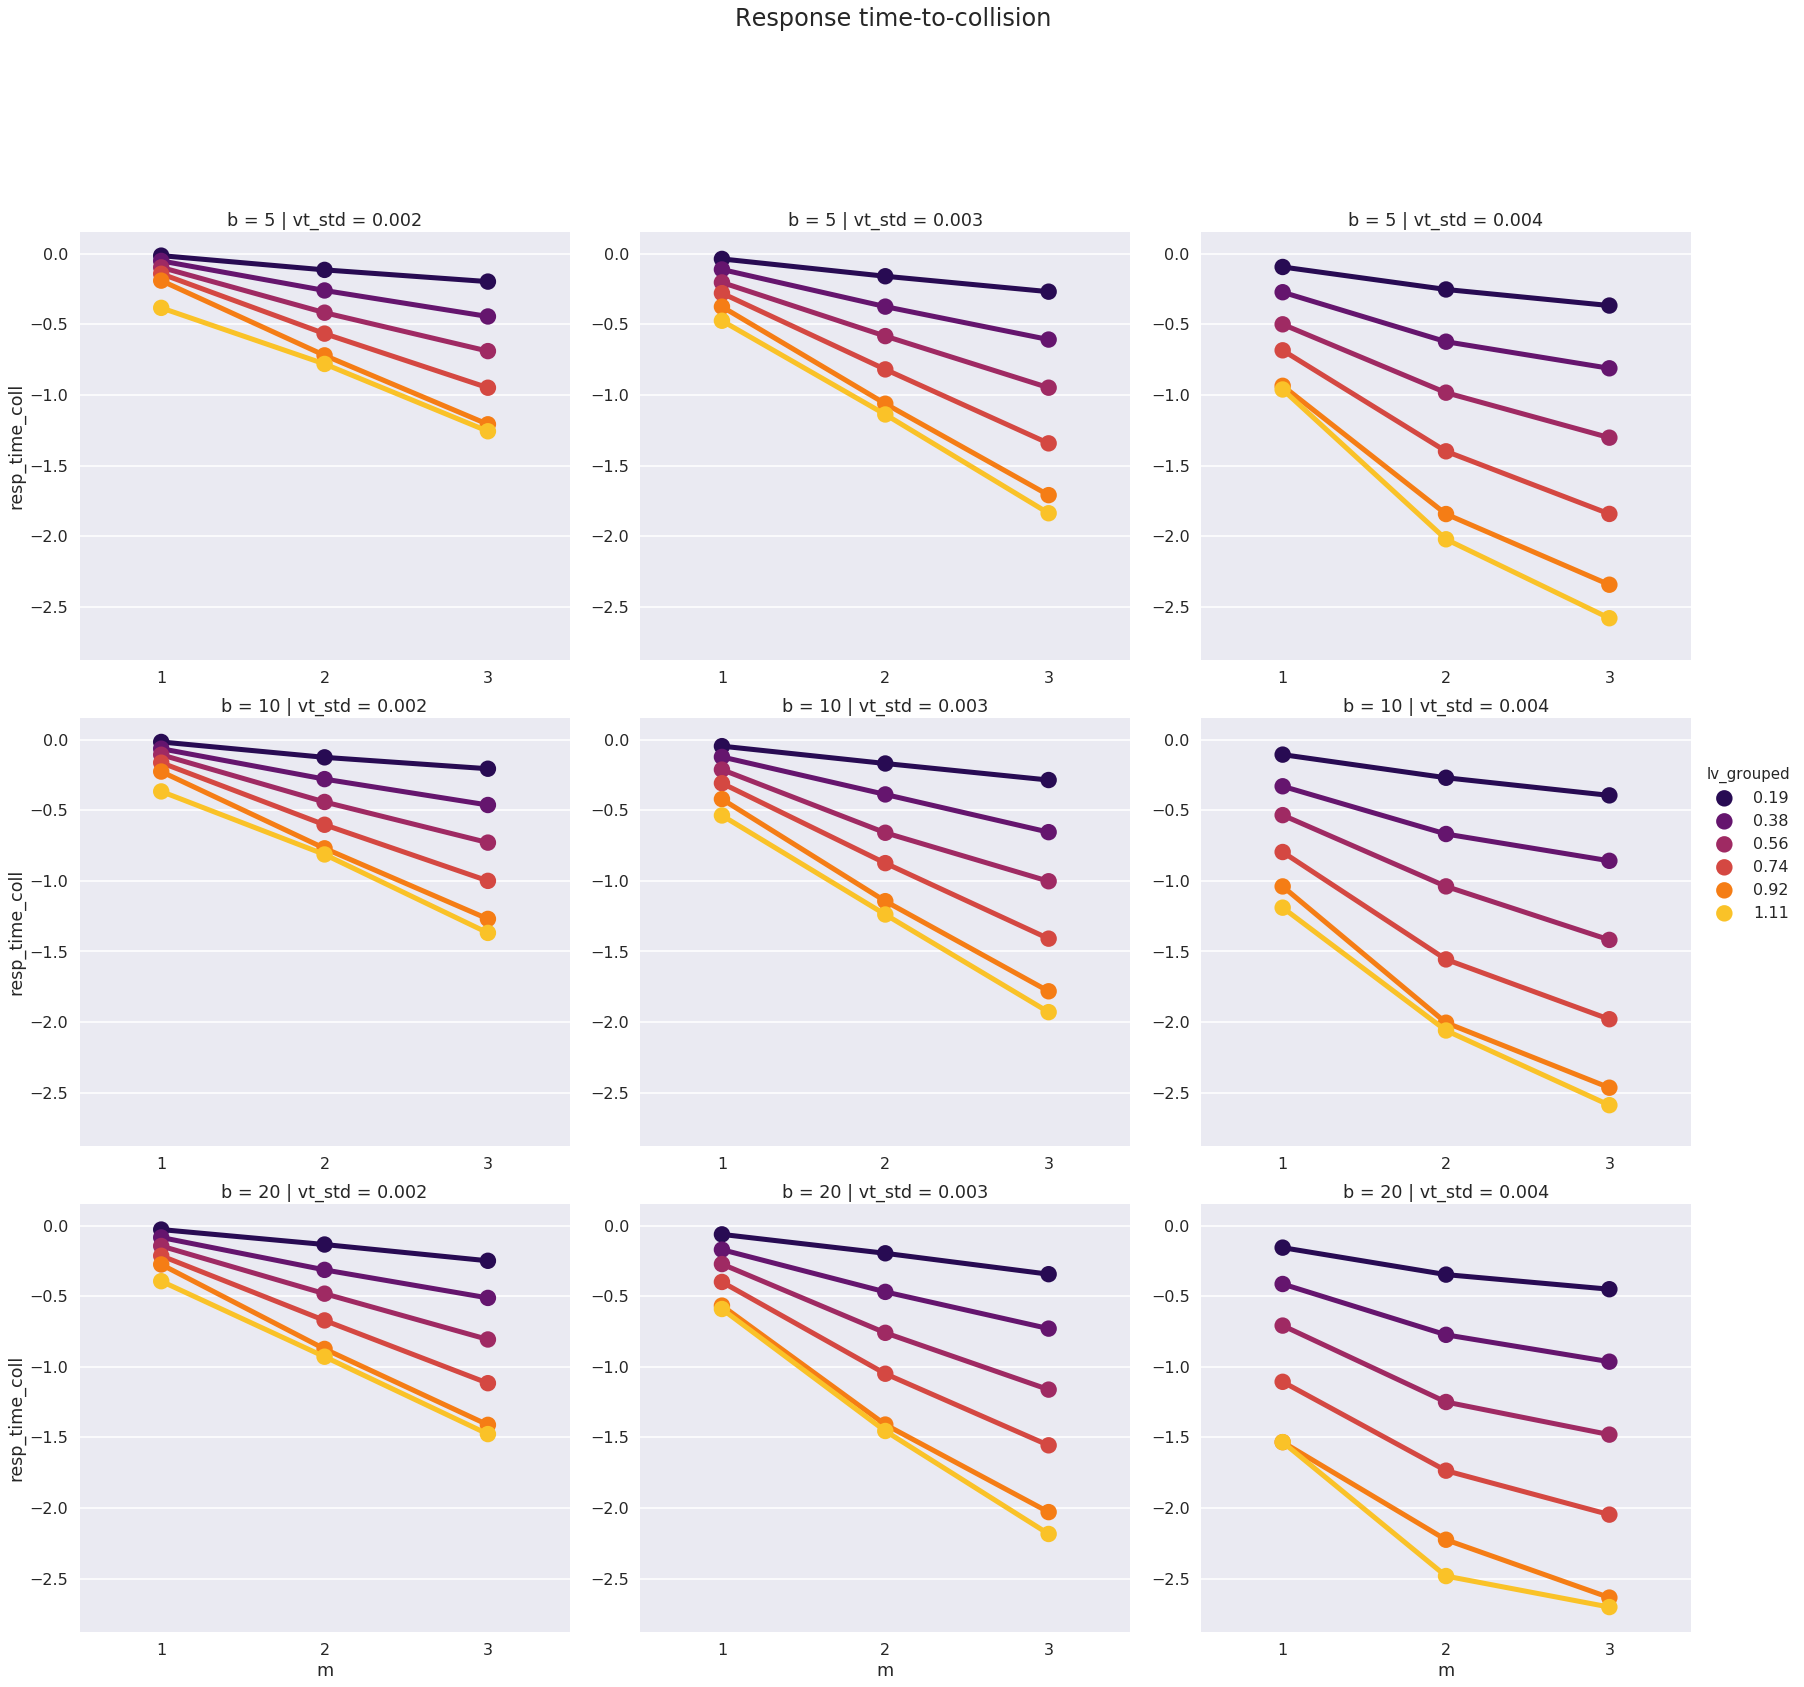

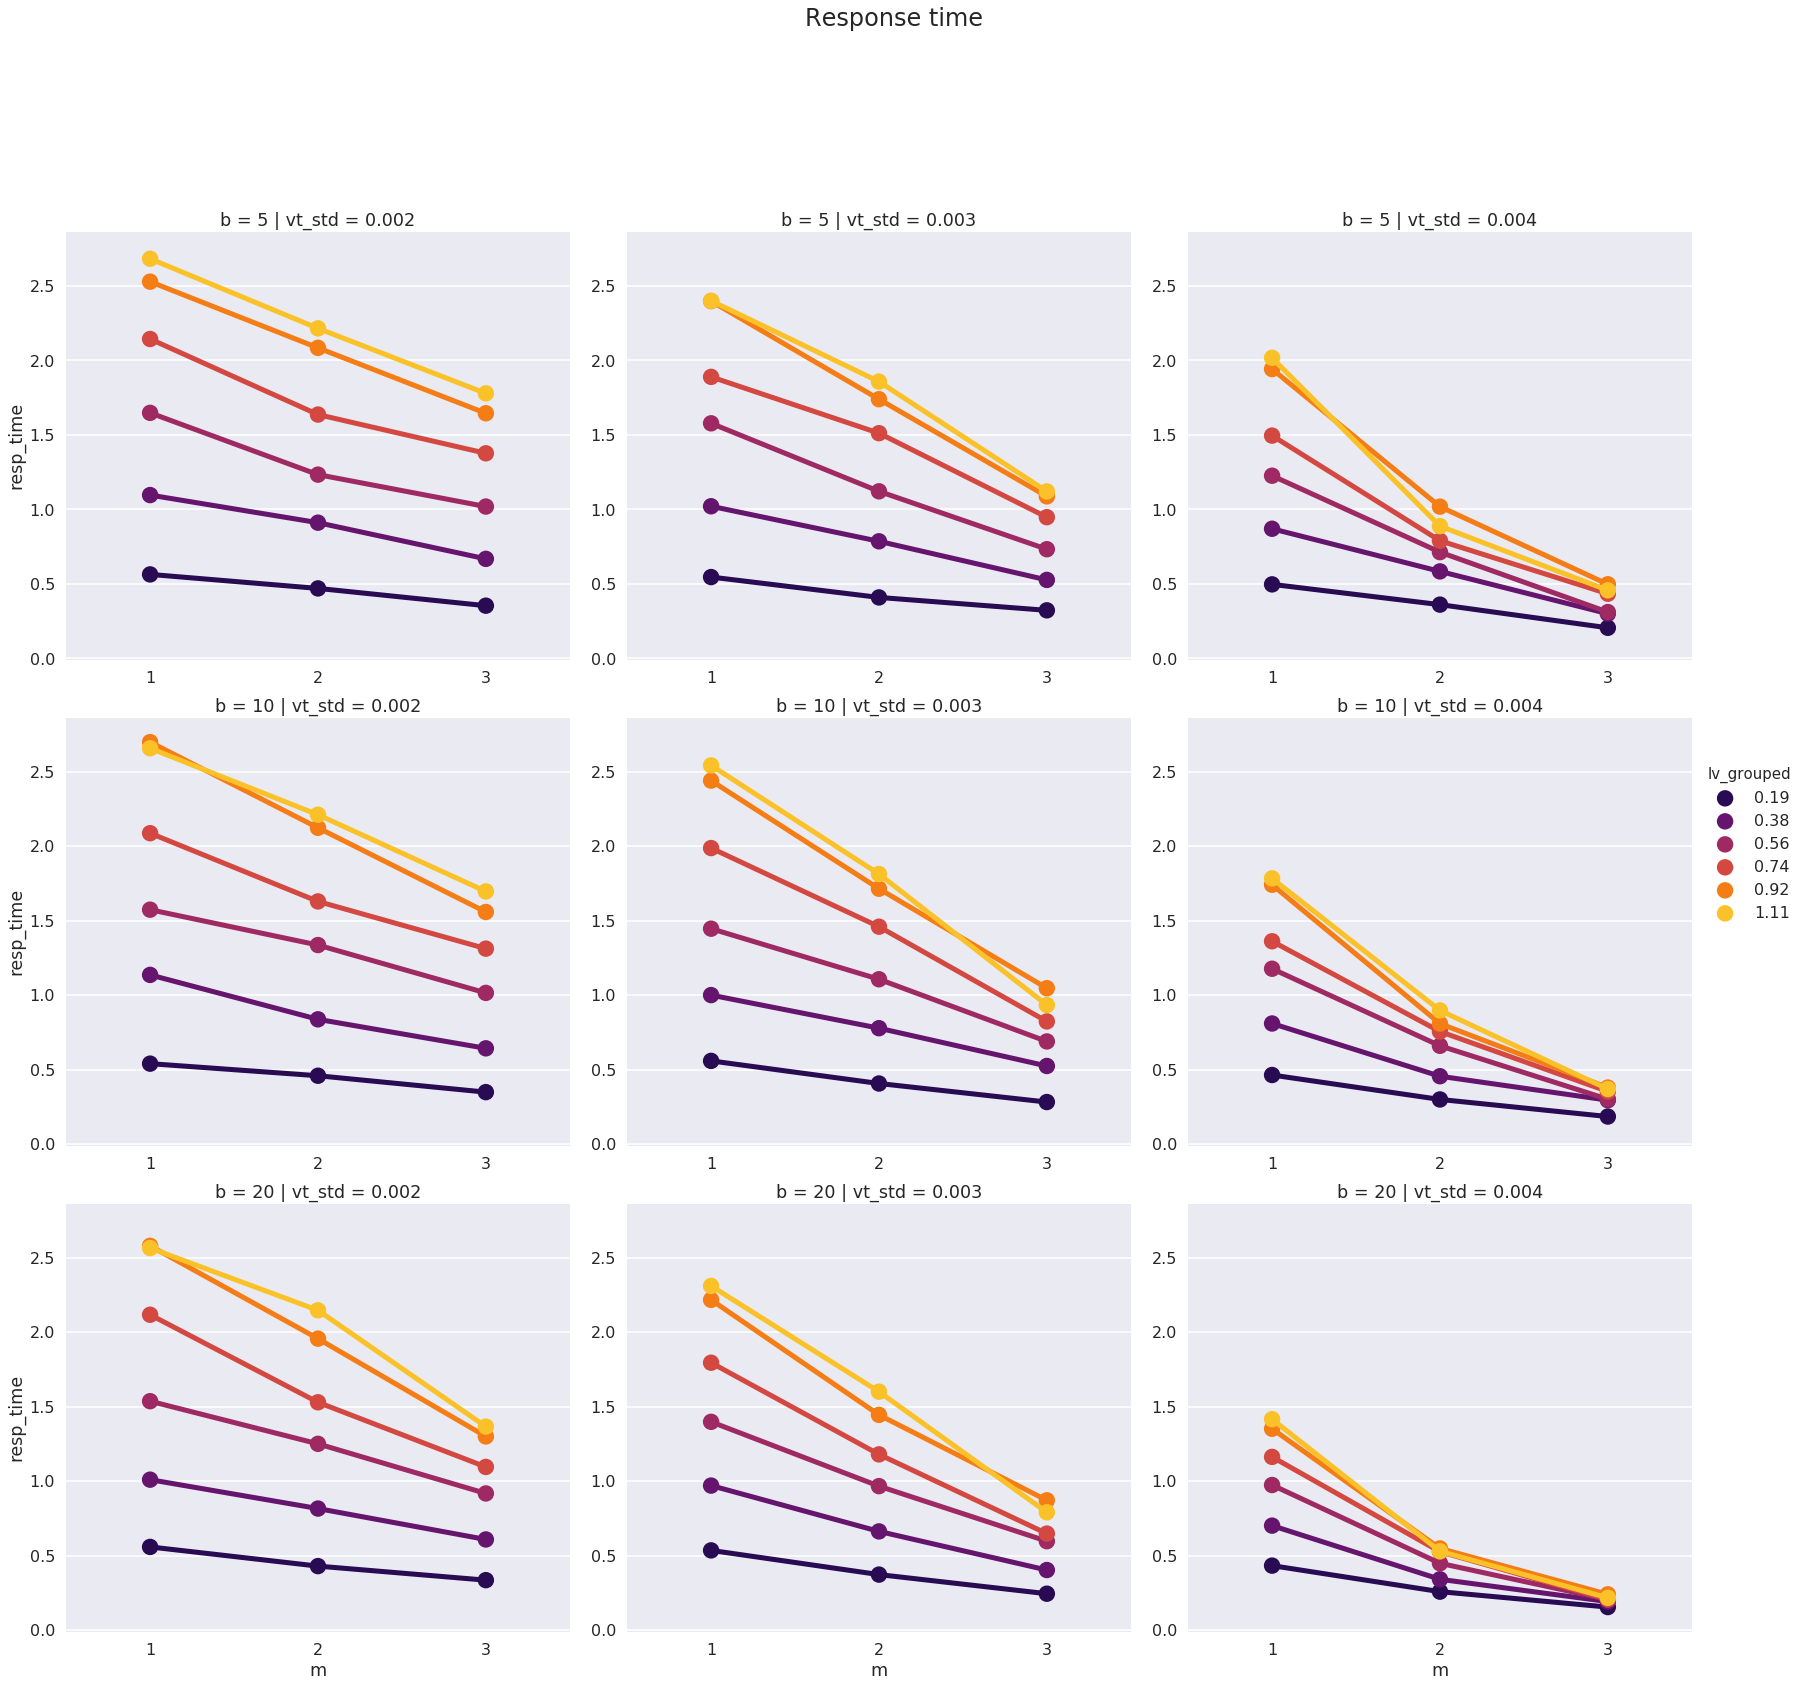

In [26]:
sns.set('poster')
g = sns.factorplot(x='m', y='resp_dist', col='vt_std', row='b', hue='lv_grouped', data=df_vt_noise_means, size=8, aspect=1,
               palette='inferno', kind='point')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Response distance', fontsize=24)
g.savefig('resp_dist_means.pdf')

g = sns.factorplot(x='m', y='resp_angle', col='vt_std', row='b', hue='lv_grouped', data=df_vt_noise_means, size=8, aspect=1,
               palette='inferno', kind='point')
#plt.ylim([0, 100])
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Response angle', fontsize=24)
g.savefig('resp_angle_means.pdf')

g = sns.factorplot(x='m', y='resp_time_coll', col='vt_std', row='b', hue='lv_grouped', data=df_vt_noise_means, size=8, aspect=1,
               palette='inferno', kind='point')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Response time-to-collision', fontsize=24)
g.savefig('resp_time_coll_means.pdf')

g = sns.factorplot(x='m', y='resp_time', col='vt_std', row='b', hue='lv_grouped', data=df_vt_noise_means, size=8, aspect=1,
               palette='inferno', kind='point')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Response time', fontsize=24)
g.savefig('resp_time_means.pdf')